In [1]:
import scipy
import pylab
import matplotlib
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import scipy.stats as st
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import decomposition
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)

# Reset default params
# sns.set()

In [2]:
print(matplotlib.get_backend())
print('-'*41)

module://matplotlib_inline.backend_inline
-----------------------------------------


In [3]:
plt.style.use('seaborn-v0_8-white')

- disponibilité intérieure = production + variation de stock + importations - exportations
- nourriture = disponibilité intérieure - aliments pour animaux - semences - pertes - traitement - autres utilisations

In [4]:
df_population = pd.read_csv('./data/Population.csv', encoding='utf_8', encoding_errors='strict')

In [5]:
df_population.head()

Domain Code             Domain  Area Code (FAO)         Area  Element Code  \
0          OA  Annual population                2  Afghanistan           511   
1          OA  Annual population                2  Afghanistan           511   
2          OA  Annual population                3      Albania           511   
3          OA  Annual population                3      Albania           511   
4          OA  Annual population                4      Algeria           511   

                         Element  Item Code                       Item  \
0  Total Population - Both sexes       3010  Population - Est. & Proj.   
1  Total Population - Both sexes       3010  Population - Est. & Proj.   
2  Total Population - Both sexes       3010  Population - Est. & Proj.   
3  Total Population - Both sexes       3010  Population - Est. & Proj.   
4  Total Population - Both sexes       3010  Population - Est. & Proj.   

   Year Code  Year          Unit      Value Flag  \
0       2008  2008  1000 persons  27722.276    X   
1       2018  2018  1000 persons  37171.921    X   
2       2008  2008  1000 persons   3002.678    X   
3       2018  2018  1000 persons   2882.740    X   
4       2008  2008  1000 persons  34730.608    X   

                 Flag Description Note  
0  International reliable sources  NaN  
1  International reliable sources  NaN  
2  International reliable sources  NaN  
3  International reliable sources  NaN  
4  International reliable sources  NaN

In [6]:
len(df_population['Area Code (FAO)'].sort_values(ascending=True).unique())

248

In [7]:
liste_pays = [1,   2,   3,   4,   7,   8,   9,  10,  11,  12,  14,  16,  19, 20,  21,  23,  25,  27,  28,  29,  32,  33,  35,  37,  38,  39,
              40,  44,  45,  46,  48,  49,  50,  52,  53,  54,  55,  56,  57, 58,  59,  60,  63,  66,  67,  68,  70,  72,  73,  74,  75,  79,
              80,  81,  83,  84,  86,  89,  90,  91,  93,  95,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113,
              114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 129, 130, 131, 132, 133, 134, 136, 137, 138, 141, 143, 144, 146, 147,
              149, 150, 153, 154, 155, 156, 157, 158, 159, 162, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 181, 183, 184, 185, 188,
              189, 191, 193, 194, 195, 196, 197, 198, 199, 202, 203, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 220, 221, 222, 223, 225,
              226, 229, 230, 231, 233, 234, 235, 236, 237, 238, 244, 249, 250, 251, 255, 256, 272, 273, 276, 351]

In [8]:
filt = (df_population['Area Code (FAO)'].isin(liste_pays))

In [9]:
df_population = df_population.loc[filt]

In [10]:
len(df_population['Area Code (FAO)'].sort_values(ascending=True).unique())

176

In [11]:
lst = df_population['Area'].unique()
list(filter(lambda x: 'China' in x, lst))

['China']

In [12]:
df_population = df_population.loc[:, ['Area Code (FAO)', 'Area', 'Year', 'Value']]
df_population.head()

Area Code (FAO)         Area  Year      Value
0                2  Afghanistan  2008  27722.276
1                2  Afghanistan  2018  37171.921
2                3      Albania  2008   3002.678
3                3      Albania  2018   2882.740
4                4      Algeria  2008  34730.608

In [13]:
df_population.shape

(352, 4)

In [14]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 352 entries, 0 to 495
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area Code (FAO)  352 non-null    int64  
 1   Area             352 non-null    object 
 2   Year             352 non-null    int64  
 3   Value            351 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 13.8+ KB


In [15]:
df_population.describe(include='all')

Area Code (FAO)         Area         Year         Value
count        352.000000          352   352.000000  3.510000e+02
unique              NaN          176          NaN           NaN
top                 NaN  Afghanistan          NaN           NaN
freq                NaN            2          NaN           NaN
mean         128.852273          NaN  2013.000000  4.070728e+04
std           75.086585          NaN     5.007117  1.481070e+05
min            1.000000          NaN  2008.000000  4.818500e+01
25%           66.750000          NaN  2008.000000  2.703486e+03
50%          123.500000          NaN  2013.000000  9.452617e+03
75%          191.500000          NaN  2018.000000  2.824073e+04
max          351.000000          NaN  2018.000000  1.459378e+06

In [16]:
df_population.isnull().sum()

Area Code (FAO)    0
Area               0
Year               0
Value              1
dtype: int64

In [17]:
df_population.loc[df_population['Value'].isnull()]

Area Code (FAO)   Area  Year  Value
420              276  Sudan  2008    NaN

In [18]:
df_population.fillna(value=38126, inplace=True)
df_population.loc[df_population['Area']=='Sudan']

Area Code (FAO)   Area  Year      Value
420              276  Sudan  2008  38126.000
421              276  Sudan  2018  41801.533

In [19]:
df_population

Area Code (FAO)         Area  Year      Value
0                  2  Afghanistan  2008  27722.276
1                  2  Afghanistan  2018  37171.921
2                  3      Albania  2008   3002.678
3                  3      Albania  2018   2882.740
4                  4      Algeria  2008  34730.608
..               ...          ...   ...        ...
489              249        Yemen  2018  28498.683
492              251       Zambia  2008  12848.530
493              251       Zambia  2018  17351.708
494              181     Zimbabwe  2008  12379.549
495              181     Zimbabwe  2018  14438.802

[352 rows x 4 columns]

In [20]:
filt = (df_population['Year'] == 2018)
df_population_2018 = df_population[filt].copy()

In [21]:
filt = (df_population['Year'] == 2008)
df_population_2008 = df_population[filt].copy()

In [22]:
df_population_2018.head()

Area Code (FAO)                 Area  Year      Value
1                 2          Afghanistan  2018  37171.921
3                 3              Albania  2018   2882.740
5                 4              Algeria  2018  42228.408
11                7               Angola  2018  30809.787
15                8  Antigua and Barbuda  2018     96.286

In [23]:
df_population_2008.head()

Area Code (FAO)                 Area  Year      Value
0                 2          Afghanistan  2008  27722.276
2                 3              Albania  2008   3002.678
4                 4              Algeria  2008  34730.608
10                7               Angola  2008  21695.634
14                8  Antigua and Barbuda  2008     85.397

In [24]:
df_population = pd.merge(df_population_2018, df_population_2008, on=['Area Code (FAO)', 'Area'])
df_population.head()

Area Code (FAO)                 Area  Year_x    Value_x  Year_y    Value_y
0                2          Afghanistan    2018  37171.921    2008  27722.276
1                3              Albania    2018   2882.740    2008   3002.678
2                4              Algeria    2018  42228.408    2008  34730.608
3                7               Angola    2018  30809.787    2008  21695.634
4                8  Antigua and Barbuda    2018     96.286    2008     85.397

In [25]:
df_population['Diff'] = df_population['Value_x'] - df_population['Value_y']
df_population.head()

Area Code (FAO)                 Area  Year_x    Value_x  Year_y    Value_y  \
0                2          Afghanistan    2018  37171.921    2008  27722.276   
1                3              Albania    2018   2882.740    2008   3002.678   
2                4              Algeria    2018  42228.408    2008  34730.608   
3                7               Angola    2018  30809.787    2008  21695.634   
4                8  Antigua and Barbuda    2018     96.286    2008     85.397   

       Diff  
0  9449.645  
1  -119.938  
2  7497.800  
3  9114.153  
4    10.889

In [26]:
def calcul(row):
    '''
    calcul de la différence de population en pourcentage :
    
    - dans le cas où la différence est positive
    - dans le cas où la différence est négative
    
    Args:
    Returns:
    
    '''
    c = row['Diff']
    if c < 0:
        cprime = -np.round((np.absolute(c)/row['Value_y'])*100, 2)
        return cprime
    else:
        cprime = np.round((c/row['Value_x'])*100, 2)
        return cprime

In [27]:
df_population['Percent'] = df_population.apply(calcul, axis='columns')

In [28]:
df_population.head()

Area Code (FAO)                 Area  Year_x    Value_x  Year_y    Value_y  \
0                2          Afghanistan    2018  37171.921    2008  27722.276   
1                3              Albania    2018   2882.740    2008   3002.678   
2                4              Algeria    2018  42228.408    2008  34730.608   
3                7               Angola    2018  30809.787    2008  21695.634   
4                8  Antigua and Barbuda    2018     96.286    2008     85.397   

       Diff  Percent  
0  9449.645    25.42  
1  -119.938    -3.99  
2  7497.800    17.76  
3  9114.153    29.58  
4    10.889    11.31

In [29]:
df_population = df_population.loc[:, ['Area Code (FAO)', 'Area', 'Percent']]
df_population.head()

Area Code (FAO)                 Area  Percent
0                2          Afghanistan    25.42
1                3              Albania    -3.99
2                4              Algeria    17.76
3                7               Angola    29.58
4                8  Antigua and Barbuda    11.31

In [30]:
col_names = ['Area Code', 'Area', 'Var pop']

In [31]:
df_population.columns = col_names
df_population.head()

Area Code                 Area  Var pop
0          2          Afghanistan    25.42
1          3              Albania    -3.99
2          4              Algeria    17.76
3          7               Angola    29.58
4          8  Antigua and Barbuda    11.31

In [32]:
df_population.duplicated().any()

False

In [33]:
df_population.isnull().sum()

Area Code    0
Area         0
Var pop      0
dtype: int64

In [34]:
df_population.describe(include='all')

Area Code         Area     Var pop
count   176.000000          176  176.000000
unique         NaN          176         NaN
top            NaN  Afghanistan         NaN
freq           NaN            1         NaN
mean    128.852273          NaN   12.055511
std      75.193775          NaN   10.511190
min       1.000000          NaN  -18.000000
25%      66.750000          NaN    4.480000
50%     123.500000          NaN   11.120000
75%     191.500000          NaN   20.120000
max     351.000000          NaN   43.040000

In [35]:
#df_population['Area'].to_list()

In [36]:
df_pib = pd.read_csv('./data/Macro indicators.csv', encoding='utf_8', encoding_errors='strict')

In [37]:
df_pib.head()

Domain Code            Domain  Area Code (FAO)         Area  Element Code  \
0          MK  Macro Indicators                2  Afghanistan          6119   
1          MK  Macro Indicators                3      Albania          6119   
2          MK  Macro Indicators                4      Algeria          6119   
3          MK  Macro Indicators                6      Andorra          6119   
4          MK  Macro Indicators                7       Angola          6119   

                Element  Item Code                    Item  Year Code  Year  \
0  Value US$ per capita      22008  Gross Domestic Product       2018  2018   
1  Value US$ per capita      22008  Gross Domestic Product       2018  2018   
2  Value US$ per capita      22008  Gross Domestic Product       2018  2018   
3  Value US$ per capita      22008  Gross Domestic Product       2018  2018   
4  Value US$ per capita      22008  Gross Domestic Product       2018  2018   

  Unit         Value Flag                Flag Description  Note  
0  US$    483.885875    X  International reliable sources   NaN  
1  US$   5254.384798    X  International reliable sources   NaN  
2  US$   4153.957220    X  International reliable sources   NaN  
3  US$  41794.398572    X  International reliable sources   NaN  
4  US$   3289.643374    X  International reliable sources   NaN

In [38]:
len(df_pib['Area Code (FAO)'].sort_values(ascending=True).unique())

219

In [39]:
filt = (df_pib['Area Code (FAO)'].isin(liste_pays))

In [40]:
df_pib = df_pib.loc[filt]

In [41]:
len(df_pib['Area Code (FAO)'].sort_values(ascending=True).unique())

176

In [42]:
lst = df_pib['Area'].unique()
list(filter(lambda x: 'China' in x, lst))

['China']

In [43]:
df_pib = df_pib.loc[:, ['Area Code (FAO)', 'Area', 'Value']]
df_pib.head()

Area Code (FAO)                 Area         Value
0                2          Afghanistan    483.885875
1                3              Albania   5254.384798
2                4              Algeria   4153.957220
4                7               Angola   3289.643374
6                8  Antigua and Barbuda  16672.744240

In [44]:
f = (lambda x: np.round(x, 2))

In [45]:
df_pib['Value'] = df_pib['Value'].apply(f)

In [46]:
col_names = ['Area Code', 'Area', 'GDP (USD per capita)']

In [47]:
df_pib.columns = col_names
df_pib.head()

Area Code                 Area  GDP (USD per capita)
0          2          Afghanistan                483.89
1          3              Albania               5254.38
2          4              Algeria               4153.96
4          7               Angola               3289.64
6          8  Antigua and Barbuda              16672.74

In [48]:
#df_pib['Area'].to_list()

In [49]:
df = pd.merge(df_population, df_pib, on=['Area Code', 'Area'])
df[:5]

Area Code                 Area  Var pop  GDP (USD per capita)
0          2          Afghanistan    25.42                483.89
1          3              Albania    -3.99               5254.38
2          4              Algeria    17.76               4153.96
3          7               Angola    29.58               3289.64
4          8  Antigua and Barbuda    11.31              16672.74

In [50]:
col_names = ['Area Code', 'Area', 'Var pop (%)', 'Pib (usd/capita)']

In [51]:
df.columns = col_names
df.head()

Area Code                 Area  Var pop (%)  Pib (usd/capita)
0          2          Afghanistan        25.42            483.89
1          3              Albania        -3.99           5254.38
2          4              Algeria        17.76           4153.96
3          7               Angola        29.58           3289.64
4          8  Antigua and Barbuda        11.31          16672.74

In [52]:
df.duplicated().any()

False

In [53]:
df.isnull().sum()

Area Code           0
Area                0
Var pop (%)         0
Pib (usd/capita)    0
dtype: int64

In [54]:
df.describe(include='all')

Area Code         Area  Var pop (%)  Pib (usd/capita)
count   176.000000          176   176.000000        176.000000
unique         NaN          176          NaN               NaN
top            NaN  Afghanistan          NaN               NaN
freq           NaN            1          NaN               NaN
mean    128.852273          NaN    12.055511      13821.590909
std      75.193775          NaN    10.511190      19543.539188
min       1.000000          NaN   -18.000000        275.580000
25%      66.750000          NaN     4.480000       1705.560000
50%     123.500000          NaN    11.120000       5910.350000
75%     191.500000          NaN    20.120000      16562.122500
max     351.000000          NaN    43.040000     117369.540000

In [55]:
df_food = pd.read_csv('./data/Food balances.csv', encoding='utf_8', encoding_errors='strict')

In [56]:
df_food.head()

Domain Code                 Domain  Area Code (FAO)         Area  \
0         FBS  Food Balances (2010-)                2  Afghanistan   
1         FBS  Food Balances (2010-)                2  Afghanistan   
2         FBS  Food Balances (2010-)                2  Afghanistan   
3         FBS  Food Balances (2010-)                2  Afghanistan   
4         FBS  Food Balances (2010-)                2  Afghanistan   

   Element Code                        Element  Item Code         Item  \
0          5511                     Production       2901  Grand Total   
1          5611                Import Quantity       2901  Grand Total   
2          5911                Export Quantity       2901  Grand Total   
3          5301       Domestic supply quantity       2901  Grand Total   
4           664  Food supply (kcal/capita/day)       2901  Grand Total   

   Year Code  Year             Unit   Value Flag Flag Description  
0       2018  2018              NaN     NaN  NaN              NaN  
1       2018  2018              NaN     NaN  NaN              NaN  
2       2018  2018              NaN     NaN  NaN              NaN  
3       2018  2018              NaN     NaN  NaN              NaN  
4       2018  2018  kcal/capita/day  2270.0   Fc  Calculated data

In [57]:
len(df_food['Area Code (FAO)'].sort_values(ascending=True).unique())

187

In [58]:
filt = (df_food['Area Code (FAO)'].isin(liste_pays))

In [59]:
df_food = df_food.loc[filt]

In [60]:
len(df_food['Area Code (FAO)'].sort_values(ascending=True).unique())

176

In [61]:
lst = df_food['Area'].unique()
list(filter(lambda x: 'China' in x, lst))

['China']

In [62]:
#list(df_food['Area'].unique())

In [63]:
filt = (df_food['Area'] == 'France')
df_food.loc[filt][:5]

Domain Code                 Domain  Area Code (FAO)    Area  \
1116         FBS  Food Balances (2010-)               68  France   
1117         FBS  Food Balances (2010-)               68  France   
1118         FBS  Food Balances (2010-)               68  France   
1119         FBS  Food Balances (2010-)               68  France   
1120         FBS  Food Balances (2010-)               68  France   

      Element Code                        Element  Item Code         Item  \
1116          5511                     Production       2901  Grand Total   
1117          5611                Import Quantity       2901  Grand Total   
1118          5911                Export Quantity       2901  Grand Total   
1119          5301       Domestic supply quantity       2901  Grand Total   
1120           664  Food supply (kcal/capita/day)       2901  Grand Total   

      Year Code  Year             Unit   Value Flag Flag Description  
1116       2018  2018              NaN     NaN  NaN              NaN  
1117       2018  2018              NaN     NaN  NaN              NaN  
1118       2018  2018              NaN     NaN  NaN              NaN  
1119       2018  2018              NaN     NaN  NaN              NaN  
1120       2018  2018  kcal/capita/day  3477.0   Fc  Calculated data

In [64]:
df_food = df_food.loc[:, ['Area Code (FAO)', 'Area', 'Element', 'Item', 'Unit', 'Value']]
df_food.head()

Area Code (FAO)         Area                        Element         Item  \
0                2  Afghanistan                     Production  Grand Total   
1                2  Afghanistan                Import Quantity  Grand Total   
2                2  Afghanistan                Export Quantity  Grand Total   
3                2  Afghanistan       Domestic supply quantity  Grand Total   
4                2  Afghanistan  Food supply (kcal/capita/day)  Grand Total   

              Unit   Value  
0              NaN     NaN  
1              NaN     NaN  
2              NaN     NaN  
3              NaN     NaN  
4  kcal/capita/day  2270.0

In [65]:
df_food = df_food.pivot(index=['Area Code (FAO)', 'Area'], columns=['Element', 'Item', 'Unit'], values='Value')
df_food[:5]

Element                      Production Import Quantity Export Quantity  \
Item                        Grand Total     Grand Total     Grand Total   
Unit                                NaN             NaN             NaN   
Area Code (FAO) Area                                                      
1               Armenia             NaN             NaN             NaN   
2               Afghanistan         NaN             NaN             NaN   
3               Albania             NaN             NaN             NaN   
4               Algeria             NaN             NaN             NaN   
7               Angola              NaN             NaN             NaN   

Element                     Domestic supply quantity  \
Item                                     Grand Total   
Unit                                             NaN   
Area Code (FAO) Area                                   
1               Armenia                          NaN   
2               Afghanistan                      NaN   
3               Albania                          NaN   
4               Algeria                          NaN   
7               Angola                           NaN   

Element                     Food supply (kcal/capita/day)  \
Item                                          Grand Total   
Unit                                      kcal/capita/day   
Area Code (FAO) Area                                        
1               Armenia                            3074.0   
2               Afghanistan                        2270.0   
3               Albania                            3296.0   
4               Algeria                            3382.0   
7               Angola                             2451.0   

Element                     Protein supply quantity (g/capita/day)  \
Item                                                   Grand Total   
Unit                                                  g/capita/day   
Area Code (FAO) Area                                                 
1               Armenia                                      97.38   
2               Afghanistan                                  57.62   
3               Albania                                     112.89   
4               Algeria                                      90.29   
7               Angola                                       53.80   

Element                          Production Import Quantity Export Quantity  \
Item                        Animal Products Animal Products Animal Products   
Unit                                    NaN             NaN             NaN   
Area Code (FAO) Area                                                          
1               Armenia                 NaN             NaN             NaN   
2               Afghanistan             NaN             NaN             NaN   
3               Albania                 NaN             NaN             NaN   
4               Algeria                 NaN             NaN             NaN   
7               Angola                  NaN             NaN             NaN   

Element                     Domestic supply quantity  \
Item                                 Animal Products   
Unit                                             NaN   
Area Code (FAO) Area                                   
1               Armenia                          NaN   
2               Afghanistan                      NaN   
3               Albania                          NaN   
4               Algeria                          NaN   
7               Angola                           NaN   

Element                     Food supply (kcal/capita/day)  \
Item                                      Animal Products   
Unit                                      kcal/capita/day   
Area Code (FAO) Area                                        
1               Armenia                             832.0   
2               Afghanistan                         189.0   
3               Albania                            1001

In [66]:
df_food = df_food.reset_index()
df_food[:5]

Element Area Code (FAO)         Area  Production Import Quantity  \
Item                                 Grand Total     Grand Total   
Unit                                         NaN             NaN   
0                     1      Armenia         NaN             NaN   
1                     2  Afghanistan         NaN             NaN   
2                     3      Albania         NaN             NaN   
3                     4      Algeria         NaN             NaN   
4                     7       Angola         NaN             NaN   

Element Export Quantity Domestic supply quantity  \
Item        Grand Total              Grand Total   
Unit                NaN                      NaN   
0                   NaN                      NaN   
1                   NaN                      NaN   
2                   NaN                      NaN   
3                   NaN                      NaN   
4                   NaN                      NaN   

Element Food supply (kcal/capita/day) Protein supply quantity (g/capita/day)  \
Item                      Grand Total                            Grand Total   
Unit                  kcal/capita/day                           g/capita/day   
0                              3074.0                                  97.38   
1                              2270.0                                  57.62   
2                              3296.0                                 112.89   
3                              3382.0                                  90.29   
4                              2451.0                                  53.80   

Element      Production Import Quantity Export Quantity  \
Item    Animal Products Animal Products Animal Products   
Unit                NaN             NaN             NaN   
0                   NaN             NaN             NaN   
1                   NaN             NaN             NaN   
2                   NaN             NaN             NaN   
3                   NaN             NaN             NaN   
4                   NaN             NaN             NaN   

Element Domestic supply quantity Food supply (kcal/capita/day)  \
Item             Animal Products               Animal Products   
Unit                         NaN               kcal/capita/day   
0                            NaN                         832.0   
1                            NaN                         189.0   
2                            NaN                        1001.0   
3                            NaN                         382.0   
4                            NaN                         219.0   

Element Protein supply quantity (g/capita/day)   Production Import Quantity  \
Item                           Animal Products Poultry Meat    Poultry Meat   
Unit                              g/capita/day  1000 tonnes     1000 tonnes   
0                                        47.75         12.0            33.0   
1                                        10.69         29.0            25.0   
2                                        60.86         16.0            12.0   
3                                        24.30        286.0             0.0   
4                                        16.67         41.0           335.0   

Element Export Quantity Domestic supply quantity  \
Item       Poultry Meat             Poultry Meat   
Unit        1000 tonnes              1000 tonnes   
0                   0.0                     45.0   
1                   0.0                     53.0   
2                   NaN                     27.0   
3                   0.0                    286.0   
4                   0.0                    376.0   

Element Food supply (kcal/capita/day) Protein supply quantity (g/capita/day)  \
Item                     Poultry Meat                           Poultry Meat   
Unit                  kcal/capita/day                           g/capita/day   
0                                50.0                                   5.01   
1                        

In [67]:
df_food.isnull().sum()

Element                                 Item             Unit           
Area Code (FAO)                                                               0
Area                                                                          0
Production                              Grand Total      NaN                176
Import Quantity                         Grand Total      NaN                176
Export Quantity                         Grand Total      NaN                176
Domestic supply quantity                Grand Total      NaN                176
Food supply (kcal/capita/day)           Grand Total      kcal/capita/day      0
Protein supply quantity (g/capita/day)  Grand Total      g/capita/day         0
Production                              Animal Products  NaN                176
Import Quantity                         Animal Products  NaN                176
Export Quantity                         Animal Products  NaN                176
Domestic supply quantity                Animal 

In [68]:
df_food = df_food.dropna(axis='columns', how='all', subset=None)
df_food.isna().sum()

Element                                 Item             Unit           
Area Code (FAO)                                                              0
Area                                                                         0
Food supply (kcal/capita/day)           Grand Total      kcal/capita/day     0
Protein supply quantity (g/capita/day)  Grand Total      g/capita/day        0
Food supply (kcal/capita/day)           Animal Products  kcal/capita/day     0
Protein supply quantity (g/capita/day)  Animal Products  g/capita/day        0
Production                              Poultry Meat     1000 tonnes         2
Import Quantity                         Poultry Meat     1000 tonnes         0
Export Quantity                         Poultry Meat     1000 tonnes        40
Domestic supply quantity                Poultry Meat     1000 tonnes         0
Food supply (kcal/capita/day)           Poultry Meat     kcal/capita/day     0
Protein supply quantity (g/capita/day)  Poultry Meat     g

In [69]:
df_food[:3]

Element Area Code (FAO)         Area Food supply (kcal/capita/day)  \
Item                                                   Grand Total   
Unit                                               kcal/capita/day   
0                     1      Armenia                        3074.0   
1                     2  Afghanistan                        2270.0   
2                     3      Albania                        3296.0   

Element Protein supply quantity (g/capita/day) Food supply (kcal/capita/day)  \
Item                               Grand Total               Animal Products   
Unit                              g/capita/day               kcal/capita/day   
0                                        97.38                         832.0   
1                                        57.62                         189.0   
2                                       112.89                        1001.0   

Element Protein supply quantity (g/capita/day)   Production Import Quantity  \
Item                           Animal Products Poultry Meat    Poultry Meat   
Unit                              g/capita/day  1000 tonnes     1000 tonnes   
0                                        47.75         12.0            33.0   
1                                        10.69         29.0            25.0   
2                                        60.86         16.0            12.0   

Element Export Quantity Domestic supply quantity  \
Item       Poultry Meat             Poultry Meat   
Unit        1000 tonnes              1000 tonnes   
0                   0.0                     45.0   
1                   0.0                     53.0   
2                   NaN                     27.0   

Element Food supply (kcal/capita/day) Protein supply quantity (g/capita/day)  
Item                     Poultry Meat                           Poultry Meat  
Unit                  kcal/capita/day                           g/capita/day  
0                                50.0                                   5.01  
1                                 5.0                                   0.51  
2                                50.0                                   3.52

In [70]:
df_food.columns

MultiIndex([(                       'Area Code (FAO)',                '', ...),
            (                                  'Area',                '', ...),
            (         'Food supply (kcal/capita/day)',     'Grand Total', ...),
            ('Protein supply quantity (g/capita/day)',     'Grand Total', ...),
            (         'Food supply (kcal/capita/day)', 'Animal Products', ...),
            ('Protein supply quantity (g/capita/day)', 'Animal Products', ...),
            (                            'Production',    'Poultry Meat', ...),
            (                       'Import Quantity',    'Poultry Meat', ...),
            (                       'Export Quantity',    'Poultry Meat', ...),
            (              'Domestic supply quantity',    'Poultry Meat', ...),
            (         'Food supply (kcal/capita/day)',    'Poultry Meat', ...),
            ('Protein supply quantity (g/capita/day)',    'Poultry Meat', ...)],
           names=['Element', 'Item', 'U

In [71]:
col_names = ['Area Code', 'Area', 'Food supply total (kcal/capita/day)', 'Protein supply total (g/capita/day)', 'Food supply animal (kcal/capita/day)',
             'Protein supply animal (g/capita/day)', 'Production poultry (*1000 tonnes)', 'Import poultry (*1000 tonnes)', 'Export poultry (*1000 tonnes)',
             'Domestic supply poultry (*1000 tonnes)', 'Food supply poultry (kcal/capita/day)', 'Protein supply poultry (g/capita/day)']

In [72]:
df_food.columns = col_names
df_food[:3]

Area Code         Area  Food supply total (kcal/capita/day)  \
0          1      Armenia                               3074.0   
1          2  Afghanistan                               2270.0   
2          3      Albania                               3296.0   

   Protein supply total (g/capita/day)  Food supply animal (kcal/capita/day)  \
0                                97.38                                 832.0   
1                                57.62                                 189.0   
2                               112.89                                1001.0   

   Protein supply animal (g/capita/day)  Production poultry (*1000 tonnes)  \
0                                 47.75                               12.0   
1                                 10.69                               29.0   
2                                 60.86                               16.0   

   Import poultry (*1000 tonnes)  Export poultry (*1000 tonnes)  \
0                           33.0                            0.0   
1                           25.0                            0.0   
2                           12.0                            NaN   

   Domestic supply poultry (*1000 tonnes)  \
0                                    45.0   
1                                    53.0   
2                                    27.0   

   Food supply poultry (kcal/capita/day)  \
0                                   50.0   
1                                    5.0   
2                                   50.0   

   Protein supply poultry (g/capita/day)  
0                                   5.01  
1                                   0.51  
2                                   3.52

In [73]:
df_food = df_food.sort_values(by='Area')

In [74]:
list1 = df_food['Area'].to_list()
list2 = df['Area'].to_list()

In [75]:
list1 == list2

True

In [76]:
list_difference = [element for element in list1 if element not in list2]
print(list_difference)

[]


In [77]:
df = pd.merge(df_food, df, on=['Area Code', 'Area'])
df[:3]

Area Code         Area  Food supply total (kcal/capita/day)  \
0          2  Afghanistan                               2270.0   
1          3      Albania                               3296.0   
2          4      Algeria                               3382.0   

   Protein supply total (g/capita/day)  Food supply animal (kcal/capita/day)  \
0                                57.62                                 189.0   
1                               112.89                                1001.0   
2                                90.29                                 382.0   

   Protein supply animal (g/capita/day)  Production poultry (*1000 tonnes)  \
0                                 10.69                               29.0   
1                                 60.86                               16.0   
2                                 24.30                              286.0   

   Import poultry (*1000 tonnes)  Export poultry (*1000 tonnes)  \
0                           25.0                            0.0   
1                           12.0                            NaN   
2                            0.0                            0.0   

   Domestic supply poultry (*1000 tonnes)  \
0                                    53.0   
1                                    27.0   
2                                   286.0   

   Food supply poultry (kcal/capita/day)  \
0                                    5.0   
1                                   50.0   
2                                   23.0   

   Protein supply poultry (g/capita/day)  Var pop (%)  Pib (usd/capita)  
0                                   0.51        25.42            483.89  
1                                   3.52        -3.99           5254.38  
2                                   2.08        17.76           4153.96

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Area Code                               176 non-null    int64  
 1   Area                                    176 non-null    object 
 2   Food supply total (kcal/capita/day)     176 non-null    float64
 3   Protein supply total (g/capita/day)     176 non-null    float64
 4   Food supply animal (kcal/capita/day)    176 non-null    float64
 5   Protein supply animal (g/capita/day)    176 non-null    float64
 6   Production poultry (*1000 tonnes)       174 non-null    float64
 7   Import poultry (*1000 tonnes)           176 non-null    float64
 8   Export poultry (*1000 tonnes)           136 non-null    float64
 9   Domestic supply poultry (*1000 tonnes)  176 non-null    float64
 10  Food supply poultry (kcal/capita/day)   176 non-null    float6

In [79]:
df.duplicated().any()

False

In [80]:
df.isnull().sum()

Area Code                                  0
Area                                       0
Food supply total (kcal/capita/day)        0
Protein supply total (g/capita/day)        0
Food supply animal (kcal/capita/day)       0
Protein supply animal (g/capita/day)       0
Production poultry (*1000 tonnes)          2
Import poultry (*1000 tonnes)              0
Export poultry (*1000 tonnes)             40
Domestic supply poultry (*1000 tonnes)     0
Food supply poultry (kcal/capita/day)      0
Protein supply poultry (g/capita/day)      0
Var pop (%)                                0
Pib (usd/capita)                           0
dtype: int64

In [81]:
df.describe(include='all')

Area Code         Area  Food supply total (kcal/capita/day)  \
count   176.000000          176                           176.000000   
unique         NaN          176                                  NaN   
top            NaN  Afghanistan                                  NaN   
freq           NaN            1                                  NaN   
mean    128.852273          NaN                          2873.329545   
std      75.193775          NaN                           452.351462   
min       1.000000          NaN                          1775.000000   
25%      66.750000          NaN                          2582.500000   
50%     123.500000          NaN                          2872.500000   
75%     191.500000          NaN                          3265.750000   
max     351.000000          NaN                          3871.000000   

        Protein supply total (g/capita/day)  \
count                            176.000000   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   
mean                              81.249318   
std                               20.753302   
min                               26.050000   
25%                               65.502500   
50%                               81.645000   
75%                               97.000000   
max                              145.310000   

        Food supply animal (kcal/capita/day)  \
count                             176.000000   
unique                                   NaN   
top                                      NaN   
freq                                     NaN   
mean                              559.607955   
std                               342.051675   
min                                29.000000   
25%                               262.000000   
50%                               540.000000   
75%                               826.250000   
max                              1638.000000   

        Protein supply animal (g/capita/day)  \
count                             176.000000   
unique                                   NaN   
top                                      NaN   
freq                                     NaN   
mean                               36.889659   
std                                20.298487   
min                                 2.610000   
25%                                19.272500   
50%                                35.815000   
75%                                51.517500   
max                               104.410000   

        Production poultry (*1000 tonnes)  Import poultry (*1000 tonnes)  \
count                          174.000000                     176.000000   
unique                                NaN                            NaN   
top                                   NaN                            NaN   
freq                                  NaN                            NaN   
mean                           737.827586                      88.653409   
std                           2597.462324                     205.064922   
min                              0.000000                       0.000000   
25%                             11.250000                       3.000000   
50%                             74.000000                      17.000000   
75%                            344.500000                      82.750000   
max                          22298.000000                    1567.000000   

        Export poultry (*1000 tonnes)  Domestic supply poultry (*1000 tonnes)  \
count                       136.00000                              176.000000   
unique                            NaN                                     NaN   
top                               NaN                                     NaN   
freq                              NaN                                     NaN   
mean                        133.75000                              688.107955   
std                       

#### Recherche des lignes qui présentent des valeurs Nan

In [82]:
filt = df.isna().any(axis=1)
df.loc[filt][:3]

Area Code          Area  Food supply total (kcal/capita/day)  \
1           3       Albania                               3296.0   
15         23        Belize                               2731.0   
22        233  Burkina Faso                               2748.0   

    Protein supply total (g/capita/day)  Food supply animal (kcal/capita/day)  \
1                                112.89                                1001.0   
15                                71.82                                 605.0   
22                                80.62                                 150.0   

    Protein supply animal (g/capita/day)  Production poultry (*1000 tonnes)  \
1                                  60.86                               16.0   
15                                 31.32                               20.0   
22                                 10.90                               42.0   

    Import poultry (*1000 tonnes)  Export poultry (*1000 tonnes)  \
1                            12.0                            NaN   
15                            0.0                            NaN   
22                            0.0                            NaN   

    Domestic supply poultry (*1000 tonnes)  \
1                                     27.0   
15                                    20.0   
22                                    43.0   

    Food supply poultry (kcal/capita/day)  \
1                                    50.0   
15                                  111.0   
22                                    7.0   

    Protein supply poultry (g/capita/day)  Var pop (%)  Pib (usd/capita)  
1                                    3.52        -3.99           5254.38  
15                                   8.32        19.90           4884.74  
22                                   0.73        25.63            813.10

In [83]:
#df.loc[:, 'Export poultry (*1000 tonnes)'] =  df.loc[:, 'Export poultry (*1000 tonnes)'].fillna(0, inplace=False)

In [84]:
df.fillna(0, inplace = True)
filt = df.isna().any(axis=1)
df.loc[filt]

Empty DataFrame
Columns: [Area Code, Area, Food supply total (kcal/capita/day), Protein supply total (g/capita/day), Food supply animal (kcal/capita/day), Protein supply animal (g/capita/day), Production poultry (*1000 tonnes), Import poultry (*1000 tonnes), Export poultry (*1000 tonnes), Domestic supply poultry (*1000 tonnes), Food supply poultry (kcal/capita/day), Protein supply poultry (g/capita/day), Var pop (%), Pib (usd/capita)]
Index: []

In [85]:
print('Classement des 10 plus gros importateurs de viande de poulet (*1000 tonnes)')
df.loc[:, 'Import poultry (*1000 tonnes)'].sort_values(ascending=False)[:10]

Classement des 10 plus gros importateurs de viande de poulet (*1000 tonnes)


31     1567.0
80     1089.0
103     983.0
60      871.0
165     802.0
138     640.0
164     609.0
111     585.0
55      533.0
146     515.0
Name: Import poultry (*1000 tonnes), dtype: float64

In [86]:
print('Classement des 10 plus petits importateurs de viande de poulet')
df.loc[:, 'Import poultry (*1000 tonnes)'].sort_values(ascending=True)[:10]

Classement des 10 plus petits importateurs de viande de poulet


52     0.0
99     0.0
96     0.0
23     0.0
22     0.0
95     0.0
132    0.0
17     0.0
110    0.0
139    0.0
Name: Import poultry (*1000 tonnes), dtype: float64

In [87]:
print('Classement des 10 plus gros exportateurs de viande de poulet (*1000 tonnes)')
df.loc[:, 'Export poultry (*1000 tonnes)'].sort_values(ascending=False)[:10]

Classement des 10 plus gros exportateurs de viande de poulet (*1000 tonnes)


20     4012.0
167    3776.0
111    1423.0
31     1209.0
126    1150.0
155     870.0
60      640.0
14      639.0
160     489.0
55      474.0
Name: Export poultry (*1000 tonnes), dtype: float64

In [88]:
print('Classement des 10 plus gros producteurs de viande de poulet (*1000 tonnes)')
df.loc[:, 'Production poultry (*1000 tonnes)'].sort_values(ascending=False)[:10]

Classement des 10 plus gros producteurs de viande de poulet (*1000 tonnes)


167    22298.0
31     20728.0
20     14095.0
131     4543.0
72      4101.0
73      3454.0
103     3377.0
126     2509.0
80      2250.0
74      2243.0
Name: Production poultry (*1000 tonnes), dtype: float64

In [89]:
print('Classement des 10 plus gros Pib par habitant (usd/capita)')
df.loc[:, 'Pib (usd/capita)'].sort_values(ascending=False)[:10]

Classement des 10 plus gros Pib par habitant (usd/capita)


94     117369.54
152     86315.13
118     81335.65
76      80137.06
71      76437.78
167     63014.66
43      62043.06
7       58596.83
151     55703.52
111     53579.54
Name: Pib (usd/capita), dtype: float64

In [90]:
df.describe(include='all')

Area Code         Area  Food supply total (kcal/capita/day)  \
count   176.000000          176                           176.000000   
unique         NaN          176                                  NaN   
top            NaN  Afghanistan                                  NaN   
freq           NaN            1                                  NaN   
mean    128.852273          NaN                          2873.329545   
std      75.193775          NaN                           452.351462   
min       1.000000          NaN                          1775.000000   
25%      66.750000          NaN                          2582.500000   
50%     123.500000          NaN                          2872.500000   
75%     191.500000          NaN                          3265.750000   
max     351.000000          NaN                          3871.000000   

        Protein supply total (g/capita/day)  \
count                            176.000000   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   
mean                              81.249318   
std                               20.753302   
min                               26.050000   
25%                               65.502500   
50%                               81.645000   
75%                               97.000000   
max                              145.310000   

        Food supply animal (kcal/capita/day)  \
count                             176.000000   
unique                                   NaN   
top                                      NaN   
freq                                     NaN   
mean                              559.607955   
std                               342.051675   
min                                29.000000   
25%                               262.000000   
50%                               540.000000   
75%                               826.250000   
max                              1638.000000   

        Protein supply animal (g/capita/day)  \
count                             176.000000   
unique                                   NaN   
top                                      NaN   
freq                                     NaN   
mean                               36.889659   
std                                20.298487   
min                                 2.610000   
25%                                19.272500   
50%                                35.815000   
75%                                51.517500   
max                               104.410000   

        Production poultry (*1000 tonnes)  Import poultry (*1000 tonnes)  \
count                          176.000000                     176.000000   
unique                                NaN                            NaN   
top                                   NaN                            NaN   
freq                                  NaN                            NaN   
mean                           729.443182                      88.653409   
std                           2583.767601                     205.064922   
min                              0.000000                       0.000000   
25%                             10.750000                       3.000000   
50%                             72.000000                      17.000000   
75%                            335.500000                      82.750000   
max                          22298.000000                    1567.000000   

        Export poultry (*1000 tonnes)  Domestic supply poultry (*1000 tonnes)  \
count                      176.000000                              176.000000   
unique                            NaN                                     NaN   
top                               NaN                                     NaN   
freq                              NaN                                     NaN   
mean                       103.352273                              688.107955   
std                       

In [91]:
df.insert(2, 'Ratio import poultry (%)', np.round(((df['Import poultry (*1000 tonnes)'] / (df['Production poultry (*1000 tonnes)'] + df['Import poultry (*1000 tonnes)'] - df['Export poultry (*1000 tonnes)']))*100), 2))

In [92]:
df.insert(3, 'Ratio export poultry (%)', np.round(((df['Export poultry (*1000 tonnes)'] / (df['Production poultry (*1000 tonnes)'] + df['Import poultry (*1000 tonnes)']))*100), 2))

In [93]:
df.insert(3, 'Ratio production poultry (%)', np.round((df['Production poultry (*1000 tonnes)'] / (df['Domestic supply poultry (*1000 tonnes)'])*100), 2))

In [94]:
df = df.drop(columns=['Import poultry (*1000 tonnes)', 'Export poultry (*1000 tonnes)', 'Production poultry (*1000 tonnes)'])
df[:3]

Area Code         Area  Ratio import poultry (%)  \
0          2  Afghanistan                     46.30   
1          3      Albania                     42.86   
2          4      Algeria                      0.00   

   Ratio production poultry (%)  Ratio export poultry (%)  \
0                         54.72                       0.0   
1                         59.26                       0.0   
2                        100.00                       0.0   

   Food supply total (kcal/capita/day)  Protein supply total (g/capita/day)  \
0                               2270.0                                57.62   
1                               3296.0                               112.89   
2                               3382.0                                90.29   

   Food supply animal (kcal/capita/day)  Protein supply animal (g/capita/day)  \
0                                 189.0                                 10.69   
1                                1001.0                                 60.86   
2                                 382.0                                 24.30   

   Domestic supply poultry (*1000 tonnes)  \
0                                    53.0   
1                                    27.0   
2                                   286.0   

   Food supply poultry (kcal/capita/day)  \
0                                    5.0   
1                                   50.0   
2                                   23.0   

   Protein supply poultry (g/capita/day)  Var pop (%)  Pib (usd/capita)  
0                                   0.51        25.42            483.89  
1                                   3.52        -3.99           5254.38  
2                                   2.08        17.76           4153.96

In [95]:
df[:3]

Area Code         Area  Ratio import poultry (%)  \
0          2  Afghanistan                     46.30   
1          3      Albania                     42.86   
2          4      Algeria                      0.00   

   Ratio production poultry (%)  Ratio export poultry (%)  \
0                         54.72                       0.0   
1                         59.26                       0.0   
2                        100.00                       0.0   

   Food supply total (kcal/capita/day)  Protein supply total (g/capita/day)  \
0                               2270.0                                57.62   
1                               3296.0                               112.89   
2                               3382.0                                90.29   

   Food supply animal (kcal/capita/day)  Protein supply animal (g/capita/day)  \
0                                 189.0                                 10.69   
1                                1001.0                                 60.86   
2                                 382.0                                 24.30   

   Domestic supply poultry (*1000 tonnes)  \
0                                    53.0   
1                                    27.0   
2                                   286.0   

   Food supply poultry (kcal/capita/day)  \
0                                    5.0   
1                                   50.0   
2                                   23.0   

   Protein supply poultry (g/capita/day)  Var pop (%)  Pib (usd/capita)  
0                                   0.51        25.42            483.89  
1                                   3.52        -3.99           5254.38  
2                                   2.08        17.76           4153.96

In [96]:
df.describe(include='all')

Area Code         Area  Ratio import poultry (%)  \
count   176.000000          176                176.000000   
unique         NaN          176                       NaN   
top            NaN  Afghanistan                       NaN   
freq           NaN            1                       NaN   
mean    128.852273          NaN                 40.260739   
std      75.193775          NaN                 42.105018   
min       1.000000          NaN                  0.000000   
25%      66.750000          NaN                  4.277500   
50%     123.500000          NaN                 25.200000   
75%     191.500000          NaN                 75.000000   
max     351.000000          NaN                247.880000   

        Ratio production poultry (%)  Ratio export poultry (%)  \
count                     176.000000                176.000000   
unique                           NaN                       NaN   
top                              NaN                       NaN   
freq                             NaN                       NaN   
mean                       77.420682                  6.370057   
std                        54.097363                 13.417261   
min                         0.000000                  0.000000   
25%                        39.482500                  0.000000   
50%                        87.370000                  0.000000   
75%                       100.000000                  7.312500   
max                       458.970000                 85.770000   

        Food supply total (kcal/capita/day)  \
count                            176.000000   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   
mean                            2873.329545   
std                              452.351462   
min                             1775.000000   
25%                             2582.500000   
50%                             2872.500000   
75%                             3265.750000   
max                             3871.000000   

        Protein supply total (g/capita/day)  \
count                            176.000000   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   
mean                              81.249318   
std                               20.753302   
min                               26.050000   
25%                               65.502500   
50%                               81.645000   
75%                               97.000000   
max                              145.310000   

        Food supply animal (kcal/capita/day)  \
count                             176.000000   
unique                                   NaN   
top                                      NaN   
freq                                     NaN   
mean                              559.607955   
std                               342.051675   
min                                29.000000   
25%                               262.000000   
50%                               540.000000   
75%                               826.250000   
max                              1638.000000   

        Protein supply animal (g/capita/day)  \
count                             176.000000   
unique                                   NaN   
top                                      NaN   
freq                                     NaN   
mean                               36.889659   
std                                20.298487   
min                                 2.610000   
25%                                19.272500   
50%                                35.815000   
75%                                51.517500   
max                               104.410000   

        Domestic supply poultry (*1000 tonnes)  \
count                               176.000000   
unique                                     NaN   
top                                        NaN   

In [97]:
df.columns

Index(['Area Code', 'Area', 'Ratio import poultry (%)',
       'Ratio production poultry (%)', 'Ratio export poultry (%)',
       'Food supply total (kcal/capita/day)',
       'Protein supply total (g/capita/day)',
       'Food supply animal (kcal/capita/day)',
       'Protein supply animal (g/capita/day)',
       'Domestic supply poultry (*1000 tonnes)',
       'Food supply poultry (kcal/capita/day)',
       'Protein supply poultry (g/capita/day)', 'Var pop (%)',
       'Pib (usd/capita)'],
      dtype='object')

In [98]:
col_names = df.columns[2:]

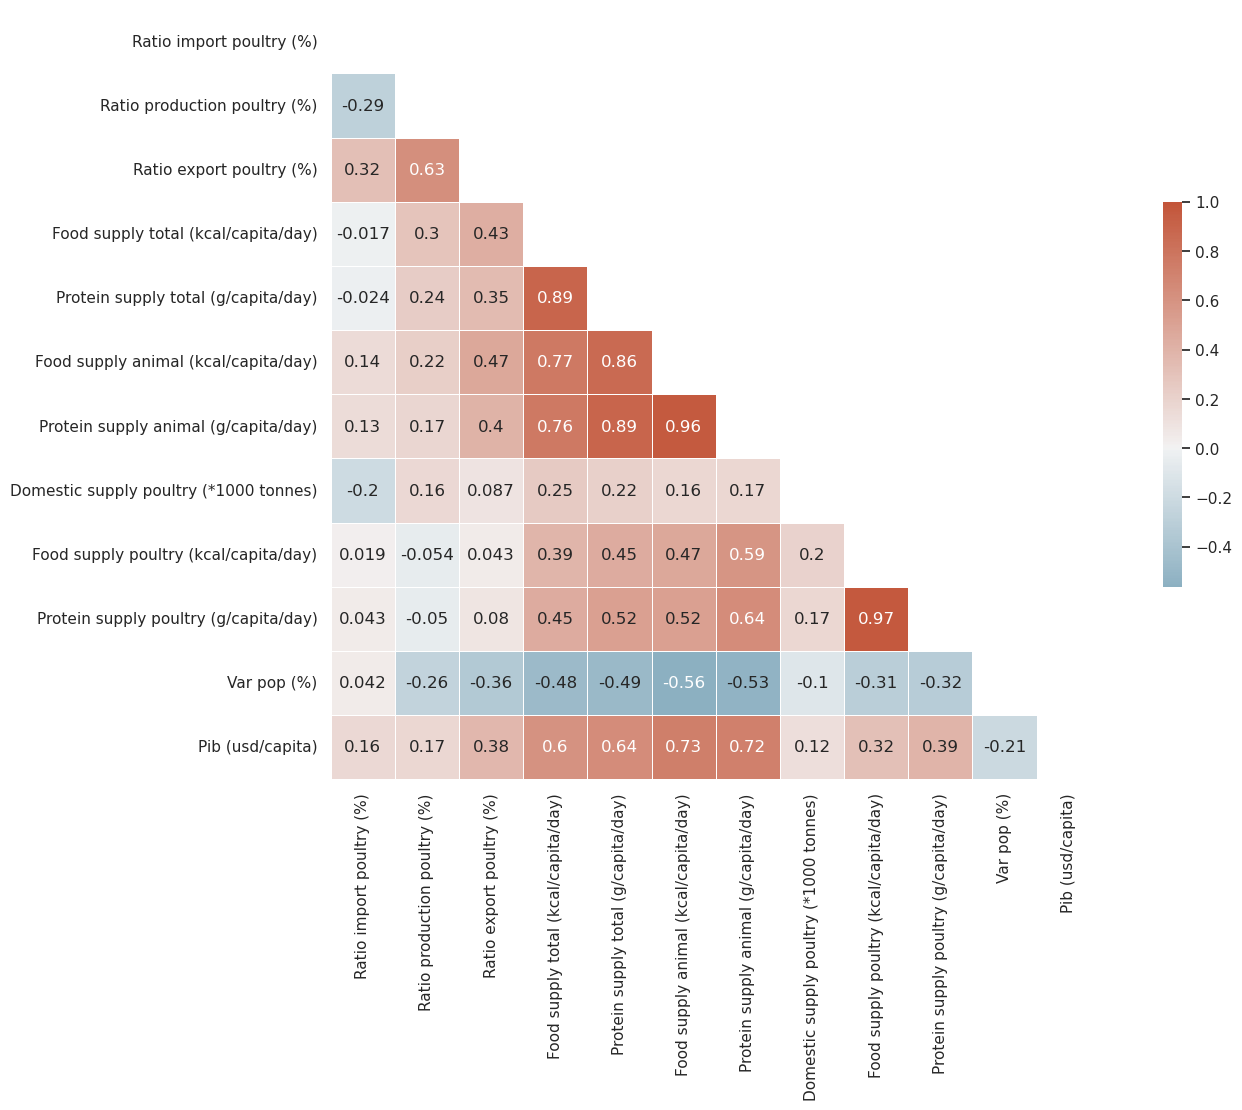

In [99]:
sns.set_theme(style='white')

# Compute the correlation matrix
corr = df[col_names].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True);

### Après études des corrélations, pour alléger le dataset, les 3 variables suivantes ne sont pas conservées :
- Food supply animal (kcal/capita/day)
- Food supply poultry (kcal/capita/day)
- Protein supply total (g/capita/day)
- Domestic supply poultry (*1000 tonnes)
- Food supply total (kcal/capita/day)

In [100]:
df = df.drop(columns=['Food supply animal (kcal/capita/day)', 
                      'Food supply poultry (kcal/capita/day)', 
                      'Protein supply total (g/capita/day)', 
                      'Domestic supply poultry (*1000 tonnes)',
                      'Food supply total (kcal/capita/day)',
                      'Protein supply poultry (g/capita/day)'])

In [101]:
df[:3]

Area Code         Area  Ratio import poultry (%)  \
0          2  Afghanistan                     46.30   
1          3      Albania                     42.86   
2          4      Algeria                      0.00   

   Ratio production poultry (%)  Ratio export poultry (%)  \
0                         54.72                       0.0   
1                         59.26                       0.0   
2                        100.00                       0.0   

   Protein supply animal (g/capita/day)  Var pop (%)  Pib (usd/capita)  
0                                 10.69        25.42            483.89  
1                                 60.86        -3.99           5254.38  
2                                 24.30        17.76           4153.96

In [102]:
col_names = df.columns[2:]

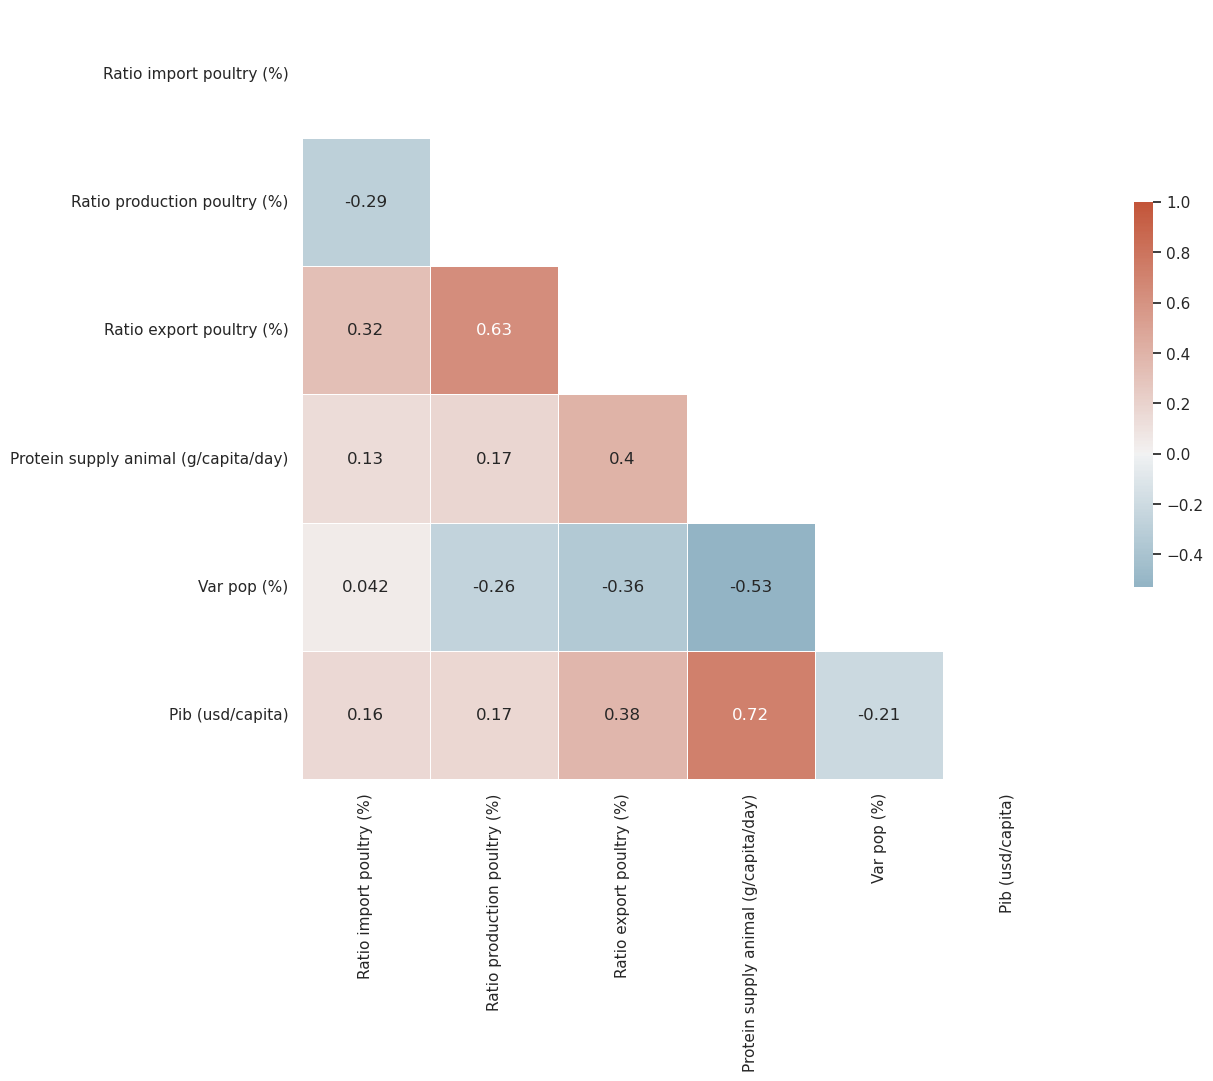

In [103]:
# Compute the correlation matrix
corr = df[col_names].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True)

plt.show()

In [104]:
df.columns.to_list()

['Area Code',
 'Area',
 'Ratio import poultry (%)',
 'Ratio production poultry (%)',
 'Ratio export poultry (%)',
 'Protein supply animal (g/capita/day)',
 'Var pop (%)',
 'Pib (usd/capita)']

In [105]:
col_names = [
'Area Code',
'Area',
'Ratio import poultry',
'Ratio production poultry',
'Ratio export poultry',
'Protein supply animal',
'Var pop',
'Pib'
]

In [106]:
df.columns = col_names
df[:3]

Area Code         Area  Ratio import poultry  Ratio production poultry  \
0          2  Afghanistan                 46.30                     54.72   
1          3      Albania                 42.86                     59.26   
2          4      Algeria                  0.00                    100.00   

   Ratio export poultry  Protein supply animal  Var pop      Pib  
0                   0.0                  10.69    25.42   483.89  
1                   0.0                  60.86    -3.99  5254.38  
2                   0.0                  24.30    17.76  4153.96

In [107]:
#sns.pairplot(df[col_names[2:]], diag_kind='kde', corner=True, height=3);

In [108]:
df = df.drop(columns='Area Code')
df[:3]

Area  Ratio import poultry  Ratio production poultry  \
0  Afghanistan                 46.30                     54.72   
1      Albania                 42.86                     59.26   
2      Algeria                  0.00                    100.00   

   Ratio export poultry  Protein supply animal  Var pop      Pib  
0                   0.0                  10.69    25.42   483.89  
1                   0.0                  60.86    -3.99  5254.38  
2                   0.0                  24.30    17.76  4153.96

In [109]:
df.set_index('Area', inplace=True)
df[:3]

Ratio import poultry  Ratio production poultry  \
Area                                                          
Afghanistan                 46.30                     54.72   
Albania                     42.86                     59.26   
Algeria                      0.00                    100.00   

             Ratio export poultry  Protein supply animal  Var pop      Pib  
Area                                                                        
Afghanistan                   0.0                  10.69    25.42   483.89  
Albania                       0.0                  60.86    -3.99  5254.38  
Algeria                       0.0                  24.30    17.76  4153.96

In [110]:
print(*df.columns, sep = '\n')

Ratio import poultry
Ratio production poultry
Ratio export poultry
Protein supply animal
Var pop
Pib


In [111]:
df[:5]

Ratio import poultry  Ratio production poultry  \
Area                                                                  
Afghanistan                         46.30                     54.72   
Albania                             42.86                     59.26   
Algeria                              0.00                    100.00   
Angola                              89.10                     10.90   
Antigua and Barbuda                100.00                      0.00   

                     Ratio export poultry  Protein supply animal  Var pop  \
Area                                                                        
Afghanistan                           0.0                  10.69    25.42   
Albania                               0.0                  60.86    -3.99   
Algeria                               0.0                  24.30    17.76   
Angola                                0.0                  16.67    29.58   
Antigua and Barbuda                   0.0                  51.57    11.31   

                          Pib  
Area                           
Afghanistan            483.89  
Albania               5254.38  
Algeria               4153.96  
Angola                3289.64  
Antigua and Barbuda  16672.74

In [112]:
len(df)

176

In [113]:
print(*df.index, sep=', ')

Afghanistan, Albania, Algeria, Angola, Antigua and Barbuda, Argentina, Armenia, Australia, Austria, Azerbaijan, Bahamas, Bangladesh, Barbados, Belarus, Belgium, Belize, Benin, Bolivia (Plurinational State of), Bosnia and Herzegovina, Botswana, Brazil, Bulgaria, Burkina Faso, Burundi, Cabo Verde, Cambodia, Cameroon, Canada, Central African Republic, Chad, Chile, China, Colombia, Comoros, Congo, Costa Rica, Cote d'Ivoire, Croatia, Cuba, Cyprus, Czechia, Democratic People's Republic of Korea, Democratic Republic of the Congo, Denmark, Djibouti, Dominica, Dominican Republic, Ecuador, Egypt, El Salvador, Estonia, Eswatini, Ethiopia, Fiji, Finland, France, French Polynesia, Gabon, Gambia, Georgia, Germany, Ghana, Greece, Grenada, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, Honduras, Hungary, Iceland, India, Indonesia, Iran (Islamic Republic of), Iraq, Ireland, Israel, Italy, Jamaica, Japan, Jordan, Kazakhstan, Kenya, Kiribati, Kuwait, Kyrgyzstan, Lao People's Democratic Republic, Latvia

In [114]:
# filt = df.index.isin(['Brazil', 'China', 'United States of America'])
# df = df.loc[~filt, :]

In [115]:
# transformer les données en array numpy
X = df.values
X[:3]

array([[ 4.63000e+01,  5.47200e+01,  0.00000e+00,  1.06900e+01,
         2.54200e+01,  4.83890e+02],
       [ 4.28600e+01,  5.92600e+01,  0.00000e+00,  6.08600e+01,
        -3.99000e+00,  5.25438e+03],
       [ 0.00000e+00,  1.00000e+02,  0.00000e+00,  2.43000e+01,
         1.77600e+01,  4.15396e+03]])

In [116]:
# Centrage et Réduction
X_scaled = preprocessing.StandardScaler().fit_transform(X)

In [117]:
df_scaled = pd.DataFrame(X_scaled, index = df.index, columns = df.columns)
df_scaled[:3]

Ratio import poultry  Ratio production poultry  \
Area                                                          
Afghanistan              0.143843                 -0.420824   
Albania                  0.061909                 -0.336661   
Algeria                 -0.958926                  0.418574   

             Ratio export poultry  Protein supply animal   Var pop       Pib  
Area                                                                          
Afghanistan              -0.47612              -1.294402  1.275081 -0.684408  
Albania                  -0.47612               1.184262 -1.530872 -0.439616  
Algeria                  -0.47612              -0.621996  0.544255 -0.496083

### Clustering kmeans

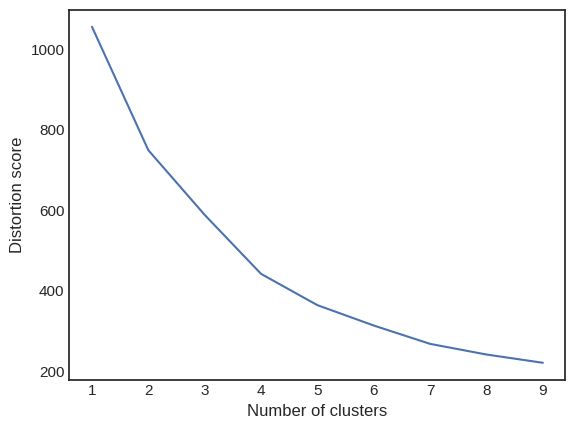

In [118]:
# choix du nombre de classes
# méthode du coude sur distortion (ou SSE)

k_range = np.arange(1, 10)
distortion_value = []

for k in k_range:
    
    km = KMeans(k, n_init=10, random_state=1)
    km.fit(X_scaled)
    distortion_value = np.append(distortion_value, km.inertia_)

plt.style.use('seaborn-v0_8-white')
plt.plot(k_range, distortion_value)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion score')
plt.show()

In [119]:
k_range = np.arange(2, 10)
score = []

for k in k_range:
    
    km = KMeans(k, n_init=10, random_state=1)
    pred = km.fit_predict(X_scaled)
    score = np.append(score, davies_bouldin_score(X_scaled, pred))

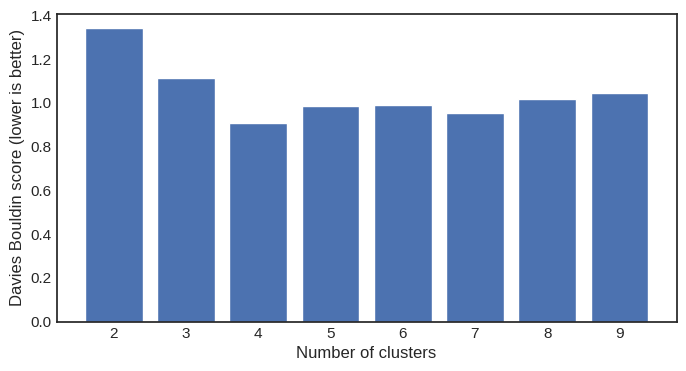

In [120]:
plt.style.use('seaborn-v0_8-white')
plt.figure(figsize=(8, 4))
plt.bar(k_range, score)
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin score (lower is better)')
plt.show()

#### Entraînement et calcul des performances du modèle

In [121]:
n_cluster = 4
km = KMeans(n_clusters=n_cluster, n_init=10, random_state=1).fit(X_scaled)

In [122]:
# Prédiction 
pred = km.predict(X_scaled)

# Silhouette score
print(silhouette_score(X_scaled, pred))

0.33386481369136156


In [123]:
pred

array([0, 3, 0, 2, 2, 3, 2, 3, 3, 0, 2, 0, 3, 3, 1, 0, 2, 0, 3, 2, 3, 3,
       0, 0, 2, 0, 0, 3, 0, 0, 3, 0, 0, 2, 2, 0, 0, 3, 2, 3, 3, 0, 2, 3,
       2, 2, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 0, 2,
       0, 0, 2, 0, 3, 3, 0, 0, 0, 2, 3, 3, 3, 0, 3, 0, 2, 0, 2, 2, 2, 0,
       3, 0, 2, 2, 2, 3, 3, 0, 0, 0, 2, 0, 3, 2, 0, 0, 2, 3, 0, 0, 0, 2,
       0, 1, 2, 3, 0, 0, 0, 2, 3, 2, 0, 0, 2, 0, 0, 0, 3, 3, 3, 0, 3, 3,
       0, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 3, 3, 2, 0, 3, 0, 0, 2, 3, 3, 0,
       2, 3, 2, 0, 0, 0, 0, 2, 0, 3, 2, 3, 0, 3, 3, 0, 2, 0, 0, 0, 0, 0],
      dtype=int32)

In [124]:
km.labels_

array([0, 3, 0, 2, 2, 3, 2, 3, 3, 0, 2, 0, 3, 3, 1, 0, 2, 0, 3, 2, 3, 3,
       0, 0, 2, 0, 0, 3, 0, 0, 3, 0, 0, 2, 2, 0, 0, 3, 2, 3, 3, 0, 2, 3,
       2, 2, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 0, 2,
       0, 0, 2, 0, 3, 3, 0, 0, 0, 2, 3, 3, 3, 0, 3, 0, 2, 0, 2, 2, 2, 0,
       3, 0, 2, 2, 2, 3, 3, 0, 0, 0, 2, 0, 3, 2, 0, 0, 2, 3, 0, 0, 0, 2,
       0, 1, 2, 3, 0, 0, 0, 2, 3, 2, 0, 0, 2, 0, 0, 0, 3, 3, 3, 0, 3, 3,
       0, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 3, 3, 2, 0, 3, 0, 0, 2, 3, 3, 0,
       2, 3, 2, 0, 0, 0, 0, 2, 0, 3, 2, 3, 0, 3, 3, 0, 2, 0, 0, 0, 0, 0],
      dtype=int32)

In [125]:
df_cluster = pd.DataFrame()
df_cluster['index'] = df.index
df_cluster['label'] = pred + 1
df_cluster

index  label
0                                          Afghanistan      1
1                                              Albania      4
2                                              Algeria      1
3                                               Angola      3
4                                  Antigua and Barbuda      3
5                                            Argentina      4
6                                              Armenia      3
7                                            Australia      4
8                                              Austria      4
9                                           Azerbaijan      1
10                                             Bahamas      3
11                                          Bangladesh      1
12                                            Barbados      4
13                                             Belarus      4
14                                             Belgium      2
15                                              Belize      1
16                                               Benin      3
17                    Bolivia (Plurinational State of)      1
18                              Bosnia and Herzegovina      4
19                                            Botswana      3
20                                              Brazil      4
21                                            Bulgaria      4
22                                        Burkina Faso      1
23                                             Burundi      1
24                                          Cabo Verde      3
25                                            Cambodia      1
26                                            Cameroon      1
27                                              Canada      4
28                            Central African Republic      1
29                                                Chad      1
30                                               Chile      4
31                                               China      1
32                                            Colombia      1
33                                             Comoros      3
34                                               Congo      3
35                                          Costa Rica      1
36                                       Cote d'Ivoire      1
37                                             Croatia      4
38                                                Cuba      3
39                                              Cyprus      4
40                                             Czechia      4
41               Democratic People's Republic of Korea      1
42                    Democratic Republic of the Congo      3
43                                             Denmark      4
44                                            Djibouti      3
45                                            Dominica      3
46                                  Dominican Republic      1
47                                             Ecuador      1
48                                               Egypt      1
49                                         El Salvador      1
50                                             Estonia      4
51                                            Eswatini      1
52                                            Ethiopia      1
53                                                Fiji      1
54                                             Finland      4
55                                              France      4
56                                    French Polynesia      3
57                                               Gabon      3
58                                              Gambia      3
59                                             Georgia      3
60                                             Germany      4
61                                               Ghana      3
62                                              Greece      4
63                                             Grenada      3
64                 

In [126]:
group = df_cluster.groupby('label', as_index=False)[['index']].count().head()
group

label  index
0      1     73
1      2      2
2      3     52
3      4     49

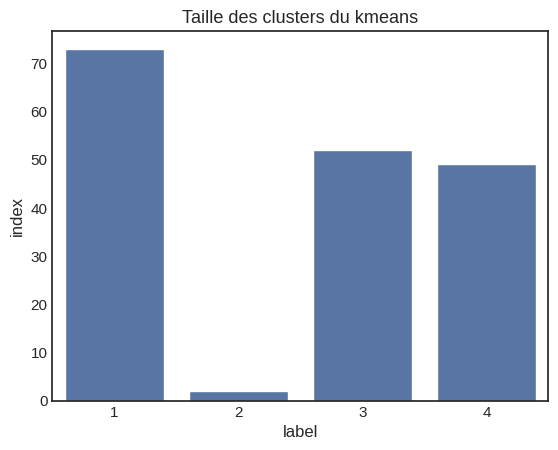

In [127]:
sns.barplot(group, x='label', y='index')
plt.title('Taille des clusters du kmeans', fontsize=13)
plt.show()

In [128]:
# Affichage du contenu des clusters

for i in range(n_cluster):
    elements = df_cluster[df_cluster['label']==i+1]['index'].tolist()  
    size = len(elements)
    print(f'Cluster {i+1} ({size} pays):\n')
    print(*elements, sep = ', ')
    print('\n')

Cluster 1 (73 pays):

Afghanistan, Algeria, Azerbaijan, Bangladesh, Belize, Bolivia (Plurinational State of), Burkina Faso, Burundi, Cambodia, Cameroon, Central African Republic, Chad, China, Colombia, Costa Rica, Cote d'Ivoire, Democratic People's Republic of Korea, Dominican Republic, Ecuador, Egypt, El Salvador, Eswatini, Ethiopia, Fiji, Guatemala, Guinea-Bissau, Guyana, Honduras, India, Indonesia, Iran (Islamic Republic of), Jamaica, Jordan, Kenya, Lao People's Democratic Republic, Lebanon, Madagascar, Malawi, Malaysia, Mali, Mauritius, Mexico, Morocco, Mozambique, Myanmar, Nepal, Nicaragua, Niger, Nigeria, Pakistan, Panama, Paraguay, Peru, Philippines, Republic of Moldova, Rwanda, Senegal, South Africa, Sri Lanka, Sudan, Syrian Arab Republic, Togo, Trinidad and Tobago, Tunisia, Turkey, Uganda, United Republic of Tanzania, Uzbekistan, Venezuela (Bolivarian Republic of), Viet Nam, Yemen, Zambia, Zimbabwe


Cluster 2 (2 pays):

Belgium, Netherlands


Cluster 3 (52 pays):

Angola, Ant

***
***

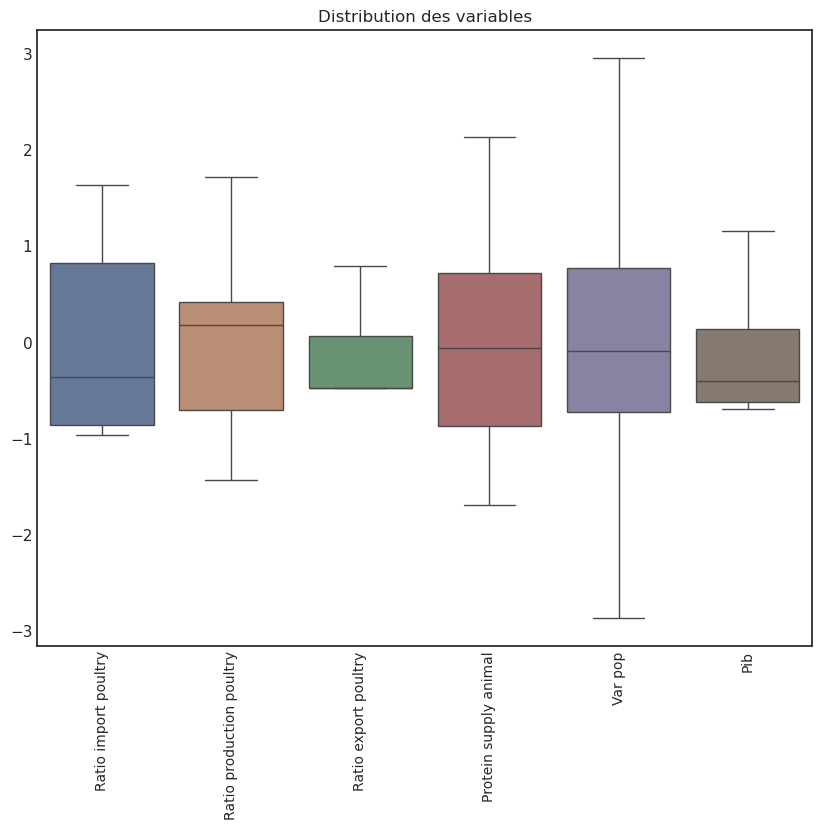

In [129]:
sns.set_style('white')
plt.figure(figsize=(10, 8))
plt.tick_params(axis='x', labelsize=10, labelrotation=90)
sns.boxplot(data=df_scaled, saturation=0.5, showfliers=False)
plt.title('Distribution des variables')
plt.show()

In [130]:
# Calcul des composantes principales

n_comp = 4
pca = decomposition.PCA(n_components=n_comp)
pca.fit(df_scaled.to_numpy())
scaled_projected = pca.transform(df_scaled.to_numpy())

In [131]:
centroids_projected = pca.transform(km.cluster_centers_)

In [132]:
# Append the principle components for each entry to the dataframe

df_scaled_projected = df_scaled.copy()

for i in range(0, n_comp):
    df_scaled_projected['F' + str(i + 1)] = scaled_projected[:, i]

df_scaled_projected[:5]

Ratio import poultry  Ratio production poultry  \
Area                                                                  
Afghanistan                      0.143843                 -0.420824   
Albania                          0.061909                 -0.336661   
Algeria                         -0.958926                  0.418574   
Angola                           1.163249                 -1.233156   
Antigua and Barbuda              1.422864                 -1.435219   

                     Ratio export poultry  Protein supply animal   Var pop  \
Area                                                                         
Afghanistan                      -0.47612              -1.294402  1.275081   
Albania                          -0.47612               1.184262 -1.530872   
Algeria                          -0.47612              -0.621996  0.544255   
Angola                           -0.47612              -0.998959  1.671979   
Antigua and Barbuda              -0.47612               0.725287 -0.071128   

                          Pib        F1        F2        F3        F4  
Area                                                                   
Afghanistan         -0.684408 -1.843533  0.115552  0.760434  0.428000  
Albania             -0.439616  0.674900  0.206087 -1.165391 -1.427339  
Algeria             -0.496083 -0.962049 -1.058035 -0.100234  0.435197  
Angola              -0.540434 -1.945322  1.472072  1.018930  0.424204  
Antigua and Barbuda  0.146303 -0.094610  2.087206 -0.300581 -0.545462

In [133]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c='red',marker='o')
    plt.xticks(np.arange(len(scree))+1)
    plt.xlabel('rang de l\'axe d\'inertie')
    plt.ylabel('pourcentage d\'inertie')
    plt.title('Eboulis des valeurs propres')

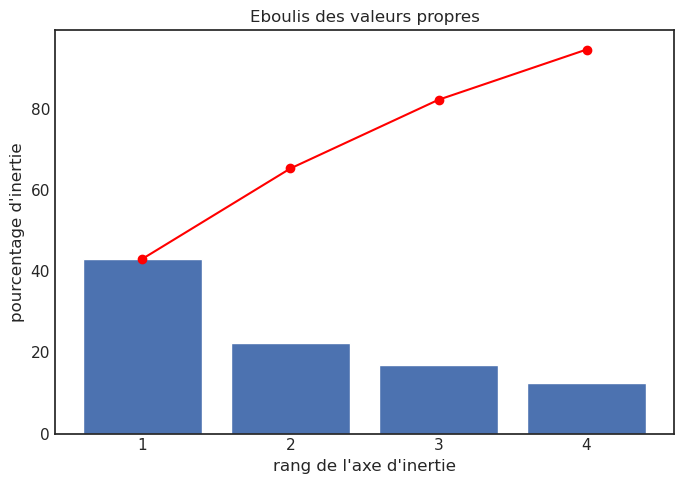

In [134]:
# Eboulis des valeurs propres
plt.figure(layout='tight', figsize=(7, 5))
display_scree_plot(pca)
plt.show()

In [135]:
np.round(100/(len(df.columns)-1), 2)

20.0

In [136]:
print(f'Avec {len(df.columns)-1} variables, on a tendance à ne pas considérer comme importants les axes dont l’inertie associée est inférieure à {np.round(100/(len(df.columns)-1), 2)} %')

Avec 5 variables, on a tendance à ne pas considérer comme importants les axes dont l’inertie associée est inférieure à 20.0 %


#### Coordonnées des composantes

In [137]:
composantes=pd.DataFrame(pca.components_)

In [138]:
composantes.columns=df_scaled.columns
composantes.index=[f'CP{x}' for x in range(1, n_comp+1)]
composantes

Ratio import poultry  Ratio production poultry  Ratio export poultry  \
CP1              0.117022                  0.344640              0.489597   
CP2              0.676154                 -0.620168             -0.096255   
CP3              0.531445                  0.315367              0.550450   
CP4             -0.236186                  0.200905             -0.031274   

     Protein supply animal   Var pop       Pib  
CP1               0.512654 -0.398109  0.454444  
CP2               0.218364  0.146909  0.282270  
CP3              -0.389457  0.314035 -0.254600  
CP4               0.051242  0.768008  0.557147

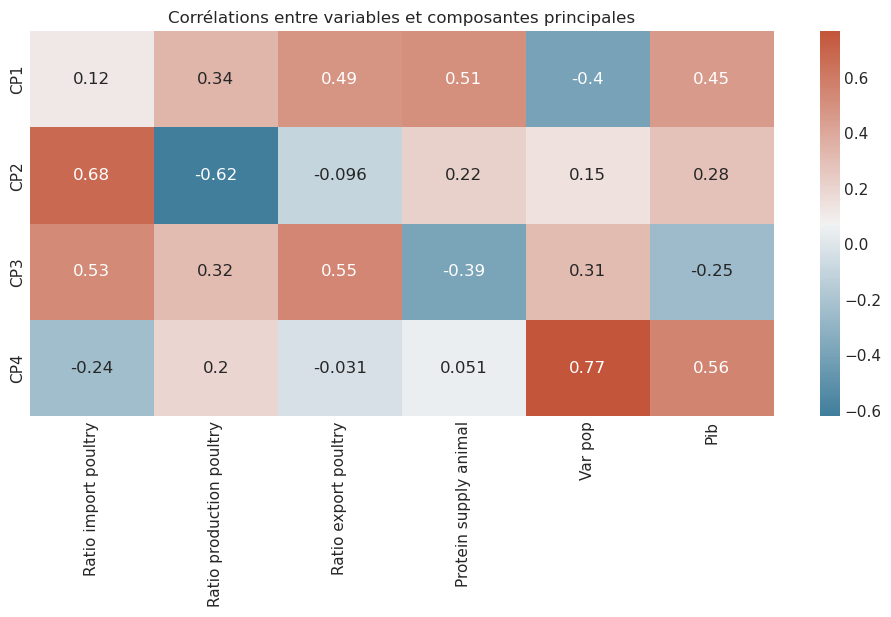

In [139]:
# Corrélations entre les variables et les composantes principales (influence de chaque variable sur chaque axe factoriel)

fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(composantes, annot=True, cmap=cmap)
plt.title('Corrélations entre variables et composantes principales')
plt.show()

In [140]:
f1, f2 = (0, 1)
scree = pca.explained_variance_ratio_*100

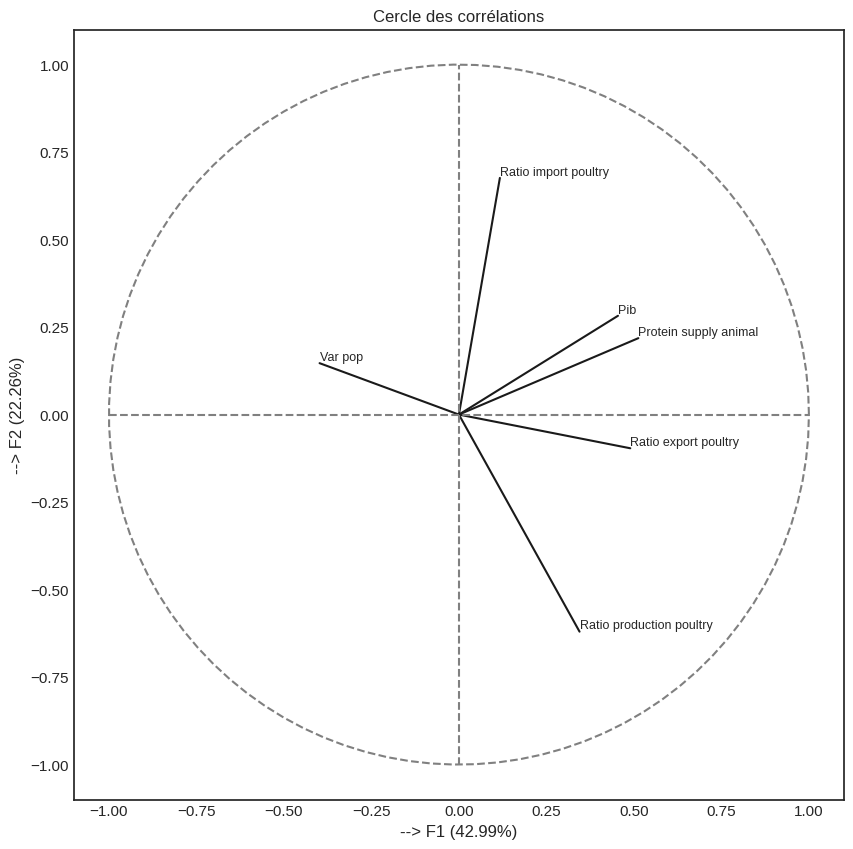

In [141]:
plt.figure(figsize = (10, 10))
plt.style.use('seaborn-v0_8-white')

# Contribution de chaque variable aux composantes principales.
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[f1, :], pcs[f2, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i+1])
    plt.text(x, y, df.columns[i], fontsize='9', ha='left',va='bottom')

# Afficher une ligne horizontale y=0
plt.plot([-1, 1], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# Add a unit circle for scale
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an), color='grey', ls='--')  

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel(f'--> F1 ({np.round(scree[f1], 2)}%)')
plt.ylabel(f'--> F2 ({np.round(scree[f2], 2)}%)')
plt.title(f'Projection des individus sur F{f1+1} et F{f2+1}')

# Set equal scaling (i.e., make circles circular) by changing axis limits. 
plt.axis('square')

plt.title('Cercle des corrélations')
plt.show()

In [142]:
df_scaled_projected[:3]

Ratio import poultry  Ratio production poultry  \
Area                                                          
Afghanistan              0.143843                 -0.420824   
Albania                  0.061909                 -0.336661   
Algeria                 -0.958926                  0.418574   

             Ratio export poultry  Protein supply animal   Var pop       Pib  \
Area                                                                           
Afghanistan              -0.47612              -1.294402  1.275081 -0.684408   
Albania                  -0.47612               1.184262 -1.530872 -0.439616   
Algeria                  -0.47612              -0.621996  0.544255 -0.496083   

                   F1        F2        F3        F4  
Area                                                 
Afghanistan -1.843533  0.115552  0.760434  0.428000  
Albania      0.674900  0.206087 -1.165391 -1.427339  
Algeria     -0.962049 -1.058035 -0.100234  0.435197

In [143]:
df_scaled_projected.insert(0, 'Cluster', pred+1)
df_scaled_projected[:5]

Cluster  Ratio import poultry  Ratio production poultry  \
Area                                                                           
Afghanistan                1              0.143843                 -0.420824   
Albania                    4              0.061909                 -0.336661   
Algeria                    1             -0.958926                  0.418574   
Angola                     3              1.163249                 -1.233156   
Antigua and Barbuda        3              1.422864                 -1.435219   

                     Ratio export poultry  Protein supply animal   Var pop  \
Area                                                                         
Afghanistan                      -0.47612              -1.294402  1.275081   
Albania                          -0.47612               1.184262 -1.530872   
Algeria                          -0.47612              -0.621996  0.544255   
Angola                           -0.47612              -0.998959  1.671979   
Antigua and Barbuda              -0.47612               0.725287 -0.071128   

                          Pib        F1        F2        F3        F4  
Area                                                                   
Afghanistan         -0.684408 -1.843533  0.115552  0.760434  0.428000  
Albania             -0.439616  0.674900  0.206087 -1.165391 -1.427339  
Algeria             -0.496083 -0.962049 -1.058035 -0.100234  0.435197  
Angola              -0.540434 -1.945322  1.472072  1.018930  0.424204  
Antigua and Barbuda  0.146303 -0.094610  2.087206 -0.300581 -0.545462

In [144]:
filt = (df_scaled_projected['Cluster'] == 4)
display(df_scaled_projected.loc[filt][:5])

Cluster  Ratio import poultry  Ratio production poultry  \
Area                                                                 
Albania          4              0.061909                 -0.336661   
Argentina        4             -0.943206                  0.562057   
Australia        4             -0.927487                  0.455279   
Austria          4              0.524929                  0.104541   
Barbados         4             -0.708124                  0.315503   

           Ratio export poultry  Protein supply animal   Var pop       Pib  \
Area                                                                         
Albania               -0.476120               1.184262 -1.530872 -0.439616   
Argentina              0.103142               1.627922 -0.229505 -0.107888   
Australia             -0.242921               1.748471  0.216051  2.297587   
Austria                1.855877               1.437217 -0.560572  1.917196   
Barbados              -0.476120               0.670941 -0.926939  0.201371   

                 F1        F2        F3        F4  
Area                                               
Albania    0.674900  0.206087 -1.165391 -1.427339  
Argentina  1.010729 -0.704941 -0.945843  0.179512  
Australia  1.783910  0.175992 -1.681114  1.853742  
Austria    2.837311  0.884114  0.109617  0.550264  
Barbados   0.597256 -0.561462 -1.142572 -0.319798

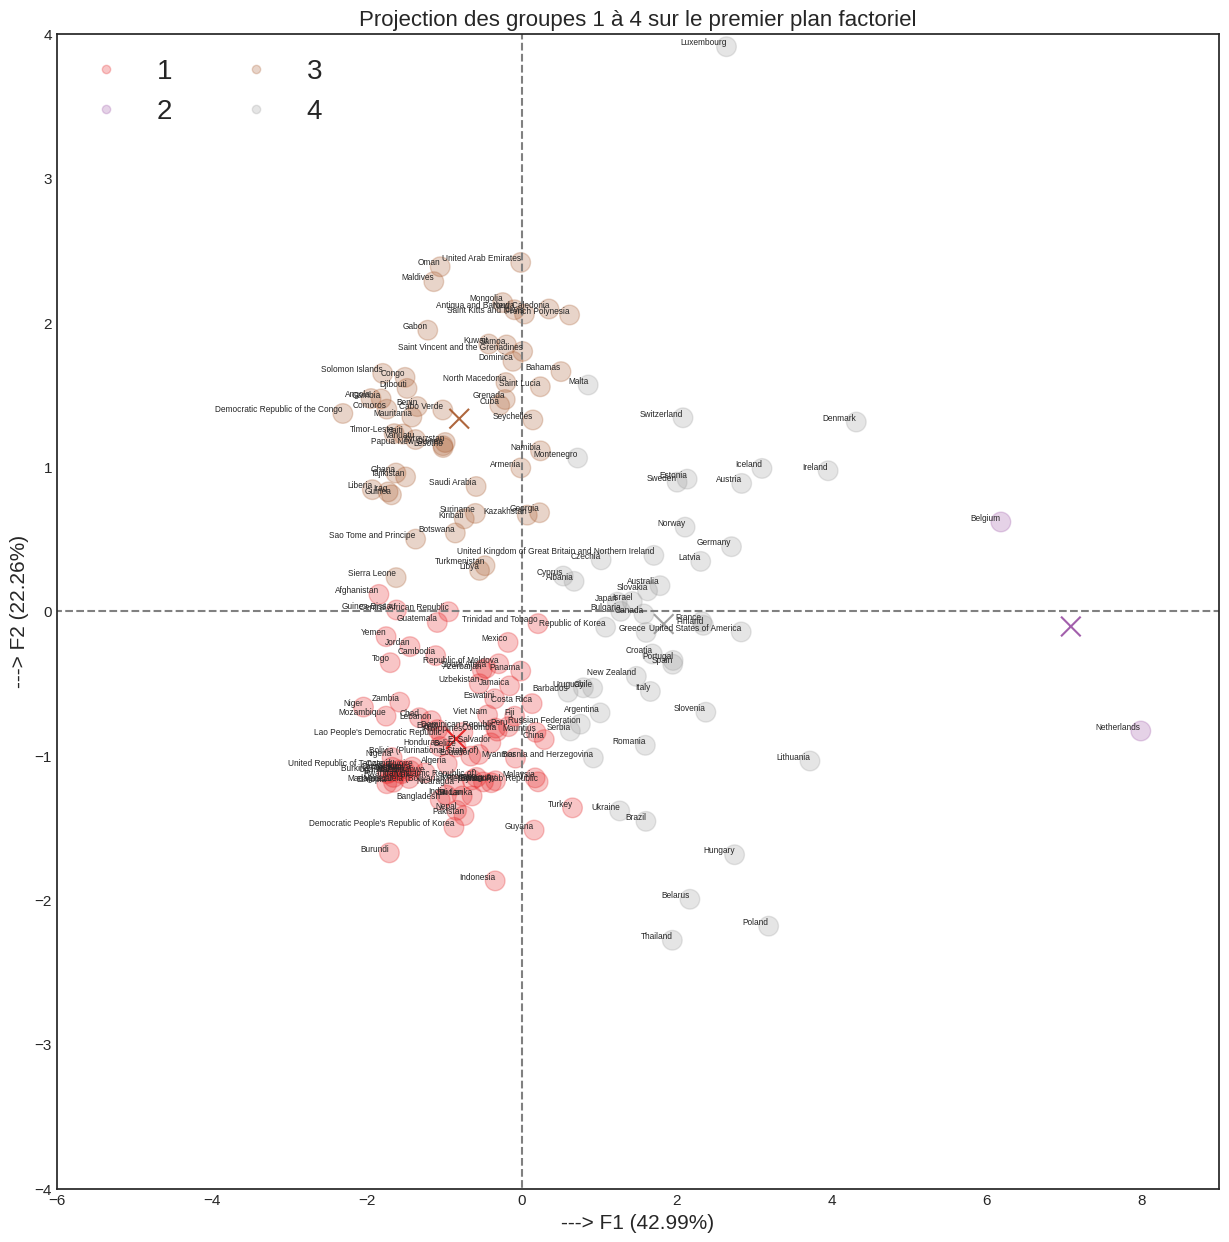

In [145]:
fig = plt.figure(figsize=(15, 15))
plt.style.use('seaborn-v0_8-white')

# affichage des observations
obs = plt.scatter(df_scaled_projected.loc[:, 'F1'], df_scaled_projected.loc[:, 'F2'], c=df_scaled_projected.loc[:, 'Cluster'], cmap='Set1', s=200, alpha=.25)

# affichage des labels des points
for i, (x, y) in enumerate(zip(df_scaled_projected.loc[:, 'F1'], df_scaled_projected.loc[:, 'F2'])):
    plt.text(x, y, df_scaled_projected.index[i], fontsize='6', ha='right', va='bottom')
        
# Affichage des positions des centres de classes
plt.scatter(centroids_projected[:, 0], centroids_projected[:, 1], marker='x', c=range(n_cluster), cmap='Set1', s=200, alpha=.9)
        
# affichage des lignes horizontales et verticales
plt.plot([-10, 10], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-10, 10], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel(f'---> F1 ({np.round(scree[f1], 2)}%)', fontsize='15')
plt.ylabel(f'---> F2 ({np.round(scree[f2], 2)}%)', fontsize='15')

# limites du graphique       
plt.xlim([-6, 9])
plt.ylim([-4, 4])

plt.legend(*obs.legend_elements(), bbox_to_anchor=(.25, 1), ncol=2, fontsize=20)
plt.title(f'Projection des groupes 1 à 4 sur le premier plan factoriel', fontsize=16)

plt.show()

In [146]:
df_cluster = df_cluster.set_index('index', drop=True, verify_integrity=True)
df_cluster[:3]

label
index             
Afghanistan      1
Albania          4
Algeria          1

In [147]:
display(df.info(verbose=False))
display(df_cluster.info(verbose=False))

<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, Afghanistan to Zimbabwe
Columns: 6 entries, Ratio import poultry to Pib
dtypes: float64(6)
memory usage: 13.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, Afghanistan to Zimbabwe
Columns: 1 entries, label to label
dtypes: int32(1)
memory usage: 2.1+ KB


None

In [148]:
df = df_cluster.join(df)
df[:3]

label  Ratio import poultry  Ratio production poultry  \
index                                                                
Afghanistan      1                 46.30                     54.72   
Albania          4                 42.86                     59.26   
Algeria          1                  0.00                    100.00   

             Ratio export poultry  Protein supply animal  Var pop      Pib  
index                                                                       
Afghanistan                   0.0                  10.69    25.42   483.89  
Albania                       0.0                  60.86    -3.99  5254.38  
Algeria                       0.0                  24.30    17.76  4153.96

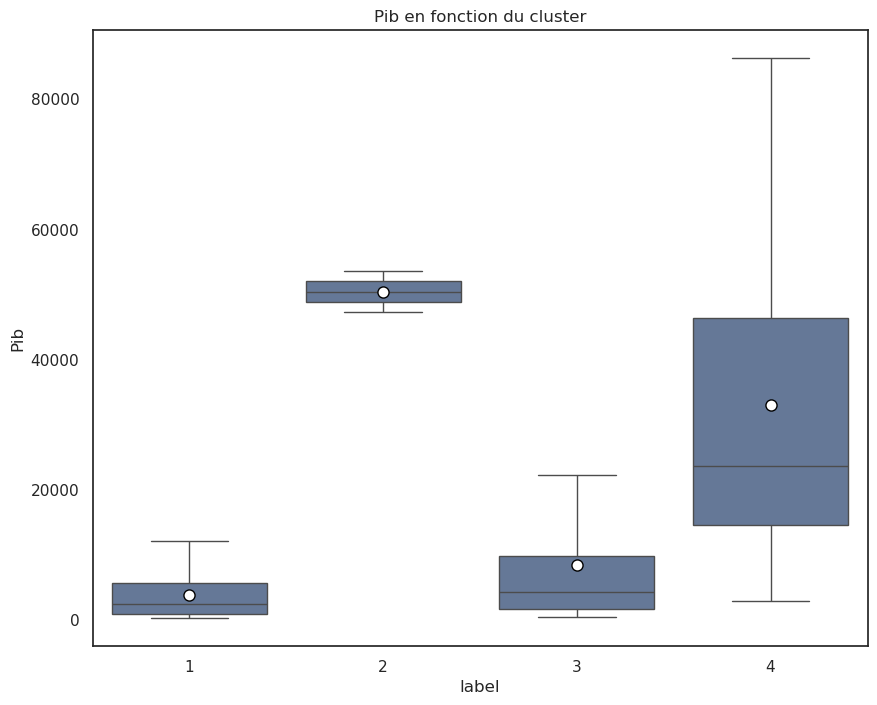

In [149]:
sns.set_theme(style='white')
plt.figure(figsize=(10, 8))
plt.title('Pib en fonction du cluster')
sns.boxplot(y='Pib', x='label', data=df, orient='v', saturation=0.5, showfliers=False, showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"8"})
plt.show()

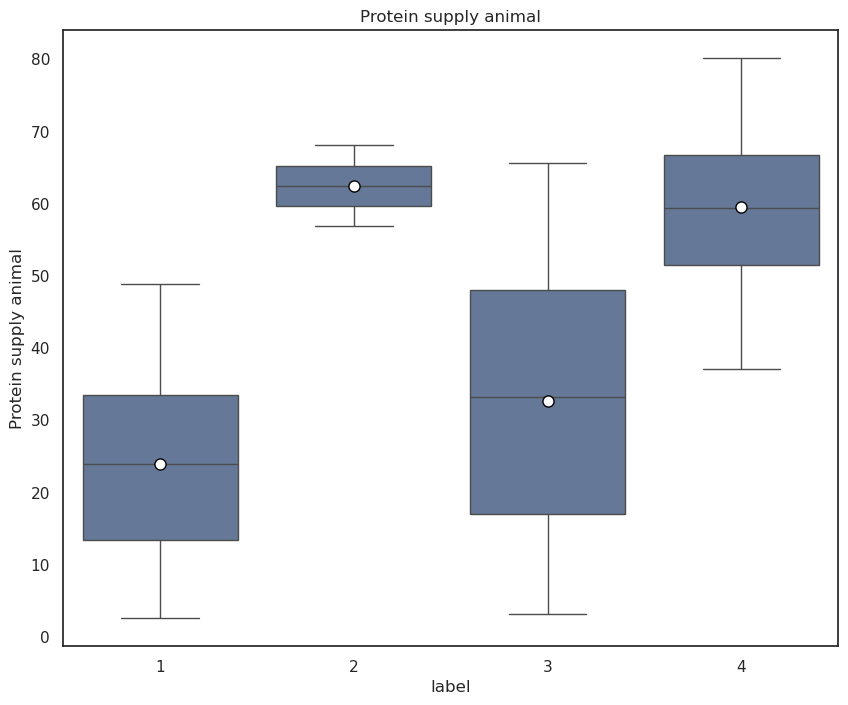

In [150]:
plt.figure(figsize=(10, 8))
plt.title('Protein supply animal')
sns.boxplot(y='Protein supply animal', x='label', data=df, orient='v', saturation=0.5, showfliers=False, showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"8"})
plt.show()

#### Calcul des valeurs médianes pour chaque cluster

In [151]:
df_median = df.groupby('label').median()
df_median

Ratio import poultry  Ratio production poultry  Ratio export poultry  \
label                                                                         
1                     4.760                    98.080                 0.000   
2                   237.000                   374.545                84.215   
3                    89.285                    12.830                 0.000   
4                    20.990                    94.440                10.810   

       Protein supply animal  Var pop        Pib  
label                                             
1                      24.01   14.370   2537.510  
2                      62.47    4.505  50467.090  
3                      33.26   16.590   4323.335  
4                      59.35    2.810  23626.030

In [152]:
# create a scaler object
scaler = preprocessing.MinMaxScaler()

# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(df_median), columns=df_median.columns, index=df_median.index)
df_norm

Ratio import poultry  Ratio production poultry  Ratio export poultry  \
label                                                                         
1                  0.000000                  0.235683              0.000000   
2                  1.000000                  1.000000              1.000000   
3                  0.363955                  0.000000              0.000000   
4                  0.069885                  0.225620              0.128362   

       Protein supply animal   Var pop       Pib  
label                                             
1                   0.000000  0.838897  0.000000  
2                   1.000000  0.123004  1.000000  
3                   0.240510  1.000000  0.037259  
4                   0.918877  0.000000  0.439990

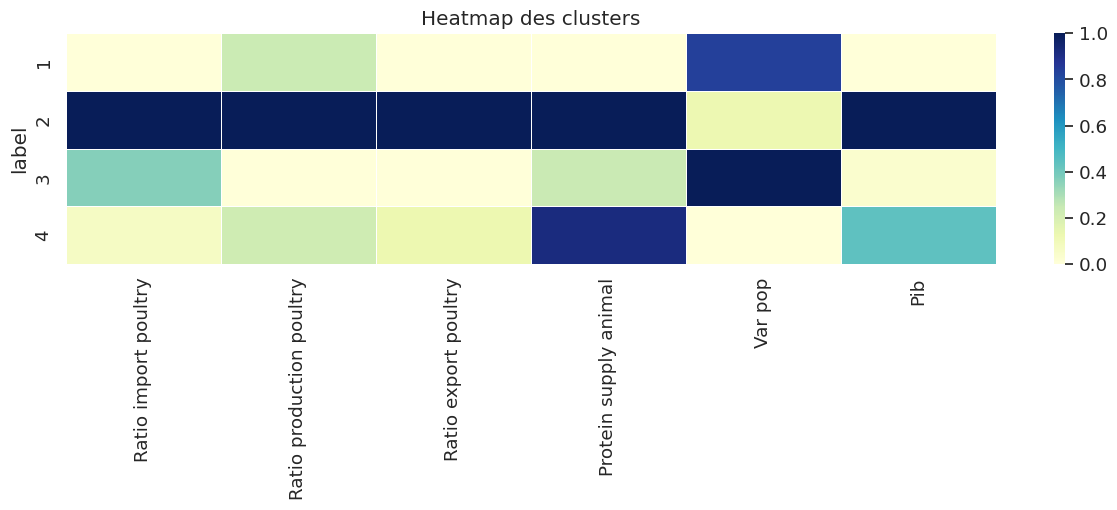

In [153]:
# heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(15, 3))
sns.heatmap(df_norm.loc[1:5, :], cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap des clusters')
plt.show()

In [154]:
df.columns.to_list()

['label',
 'Ratio import poultry',
 'Ratio production poultry',
 'Ratio export poultry',
 'Protein supply animal',
 'Var pop',
 'Pib']

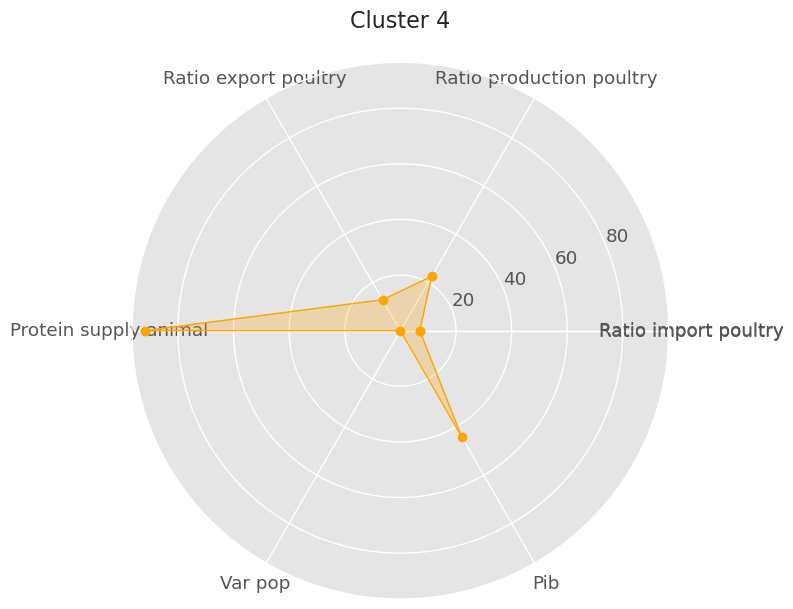

In [155]:
plt.style.use('ggplot')

categories = [
'Ratio import poultry',
'Ratio production poultry',
'Ratio export poultry',
'Protein supply animal',
'Var pop',
'Pib'
]

cluster_4 = (df_norm.loc[4, categories]*100).to_list()
cluster_4 = [*cluster_4, cluster_4[0]]


#angles=np.linspace(0,2*np.pi,len(subjects), endpoint=False)

label_loc = np.linspace(start=0, stop=2*np.pi, num=len(categories)+1, endpoint=True)
categories = [*categories, categories[0]]

fig=plt.figure(figsize=(8, 8))
ax=fig.add_subplot(111, polar=True)

ax.plot(label_loc, cluster_4, 'o-', color='orange', linewidth=1, label='Cluster 4')
ax.fill(label_loc, cluster_4, alpha=0.25, color='orange')

plt.title('Cluster 4', size=16, y=1.05)
ax.set_thetagrids(np.degrees(label_loc), categories)
plt.grid(True)
plt.tight_layout()
plt.show()

### Dans le cluster n°4, sélection de pays avec un fort PIB ainsi qu'une forte consommation de produits d'origine animale.

'Switzerland', 'Denmark', 'Ireland', 'Northern Ireland', 'Iceland', 'Austria', 'Estonia', 'Sweden', 'Norway', 'Germany', 'Latvia'

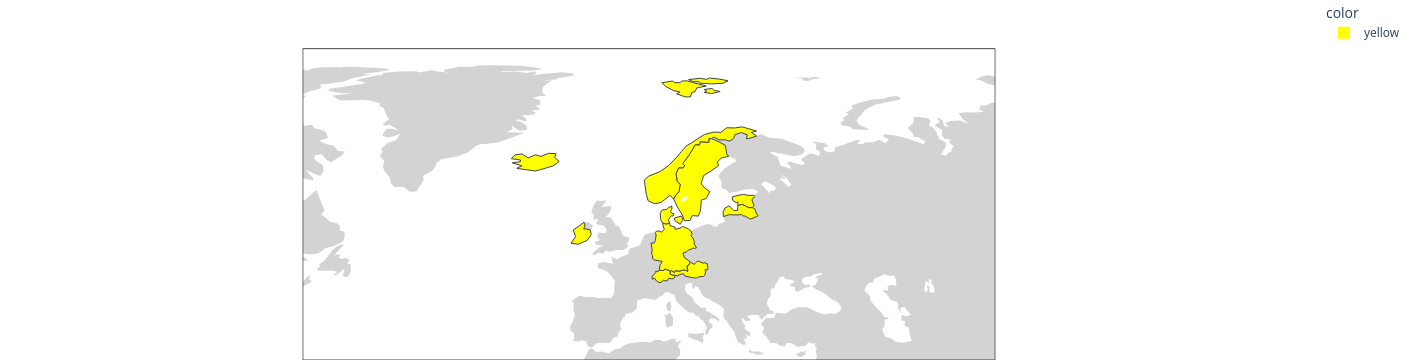

In [156]:
countries = ['Switzerland', 'Denmark', 'Ireland', 'Northern Ireland', 'Iceland', 'Austria', 'Estonia', 'Sweden', 'Norway', 'Germany', 'Latvia']

color = 'yellow'

fig = px.choropleth(locationmode='country names', locations=countries, 
                    color=[color]*len(countries), color_discrete_sequence=[color], 
                    scope='world')  # Scope set to 'europe' for better focus

fig.update_geos(
    projection_type='natural earth',
    showcoastlines=False, 
    landcolor='lightgray',
    showocean=False, 
    oceancolor='lightblue',
    center={'lat': 62, "lon": 6},  # Center on France
    projection_scale=3  # Adjust the scale for zoom level
)

fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0)
)

fig.show()